In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import sys
import json

import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
import numpy as np

%matplotlib inline


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/vscode/.cache/pypoetry/virtualenvs/winc-onepager-kkKEUEKl-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/vscode/.cache/pypoetry/virtualenvs/win

AttributeError: _ARRAY_API not found

In [3]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [4]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

In [5]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [6]:
# use yaml or csv input file
use_yaml = True

In [7]:
# pick an example from given three options

case_type = 'wildcat'

case_type = 'smeaheia_v1'

# case_type = 'smeaheia_v2'

In [8]:
# where pvt located
pvt_path = '../src/WellClass/libs/pvt/pvt_constants/pure_co2'

# Examples

The following are the test examples.

In [9]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
wildcat = {
         'well_input': r'GaP_input_Wildcat_v3.csv', 
         'well_input_yaml': r'wildcat.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/wildcat', 
         'simcase': r'TEMP-0'}

In [10]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'wildcat': wildcat
}

# Load well CSV or yaml configuration file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [11]:
# the selected example for testing
case = examples[case_type]


In [12]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


In [13]:
if use_yaml:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input_yaml'])
    
    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input'])

    # load the well information
    well_csv = csv_parser(well_name)

In [14]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

In [15]:
my_well.header

{'well_name': 'NO 32/4-1',
 'well_rkb': 23.5,
 'sf_depth_msl': 312,
 'well_td_rkb': 3186,
 'sf_temp': 4,
 'geo_tgrad': 40}

## Generation of Pressure tables
### 1. Minimum input: 

The pressure class can be initialized with a minimum of the following parameters:
- Depth to seabed in mTVDMSL
- Wellbore TD in mRKB
- Wellbore RKB in mTVDMSL
- Seafloor temperature in degC. Defaulted to 4 degC
- Geothermal gradient in degC/km. Defaulted to 40 degC/km
- Fluid type: This depends on the PVT tables available on pvtpath 
  - pure CO2, Components: 100% CO2
  - pure C1, Components: 100% CH4
  - mixture 1, Components: 96% CO2, 0.4% H, 1% Ar, 0.82% N, 1.78% CH4
  - mixture 2, Components: 95% CO2, 5% CH4
- Path to the PVT tables


In [16]:

from WellClass.libs.well_pressure.Pressure import Pressure
from WellClass.libs.well_pressure.PressureScenarioManager import PressureScenarioManager
from WellClass.libs.well_pressure.PressureScenario import PressureScenario
from WellClass.libs.well_pressure.helper_func import get_rho_from_pvt_data, load_pvt_data, _integrate_pressure



my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')

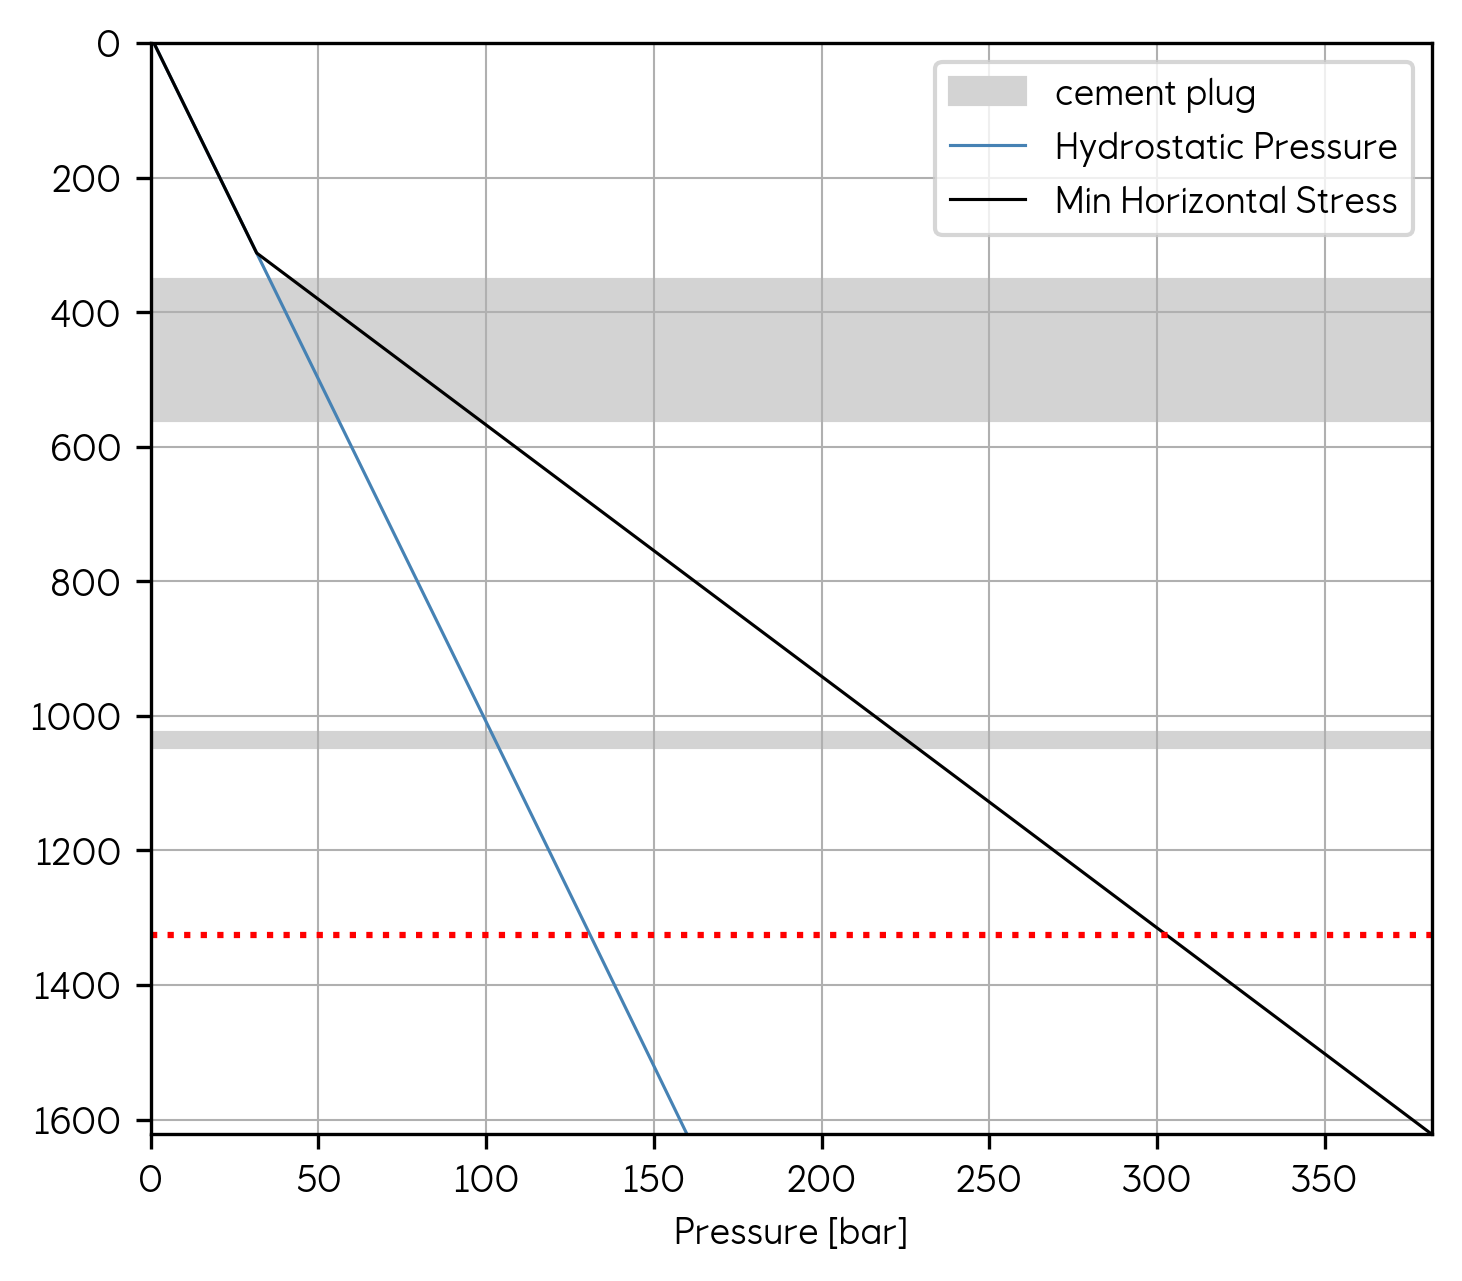

In [17]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )

z_fluid_contact = 1325
ax.axhline(z_fluid_contact, ls = ':', c='red')



In [79]:
z_r = 1000
z_p = 120
dp = 40


my_pressure.add_scenario(scenario_name='test1', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact = z_fluid_contact, p_delta = dp)


Computing pressure profile for scenario: test1


In [78]:
print(my_pressure.z_fluid_contact)

None


In [71]:
my_pressure.add_scenario(scenario_name='test1', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact = z_fluid_contact)
my_pressure.add_scenario(scenario_name='test2', fluid_type='methane', from_resrvr=True, z_fluid_contact = z_fluid_contact)


Computing pressure profile for scenario: test1
Computing pressure profile for scenario: test2


<Axes: xlabel='Pressure [bar]'>

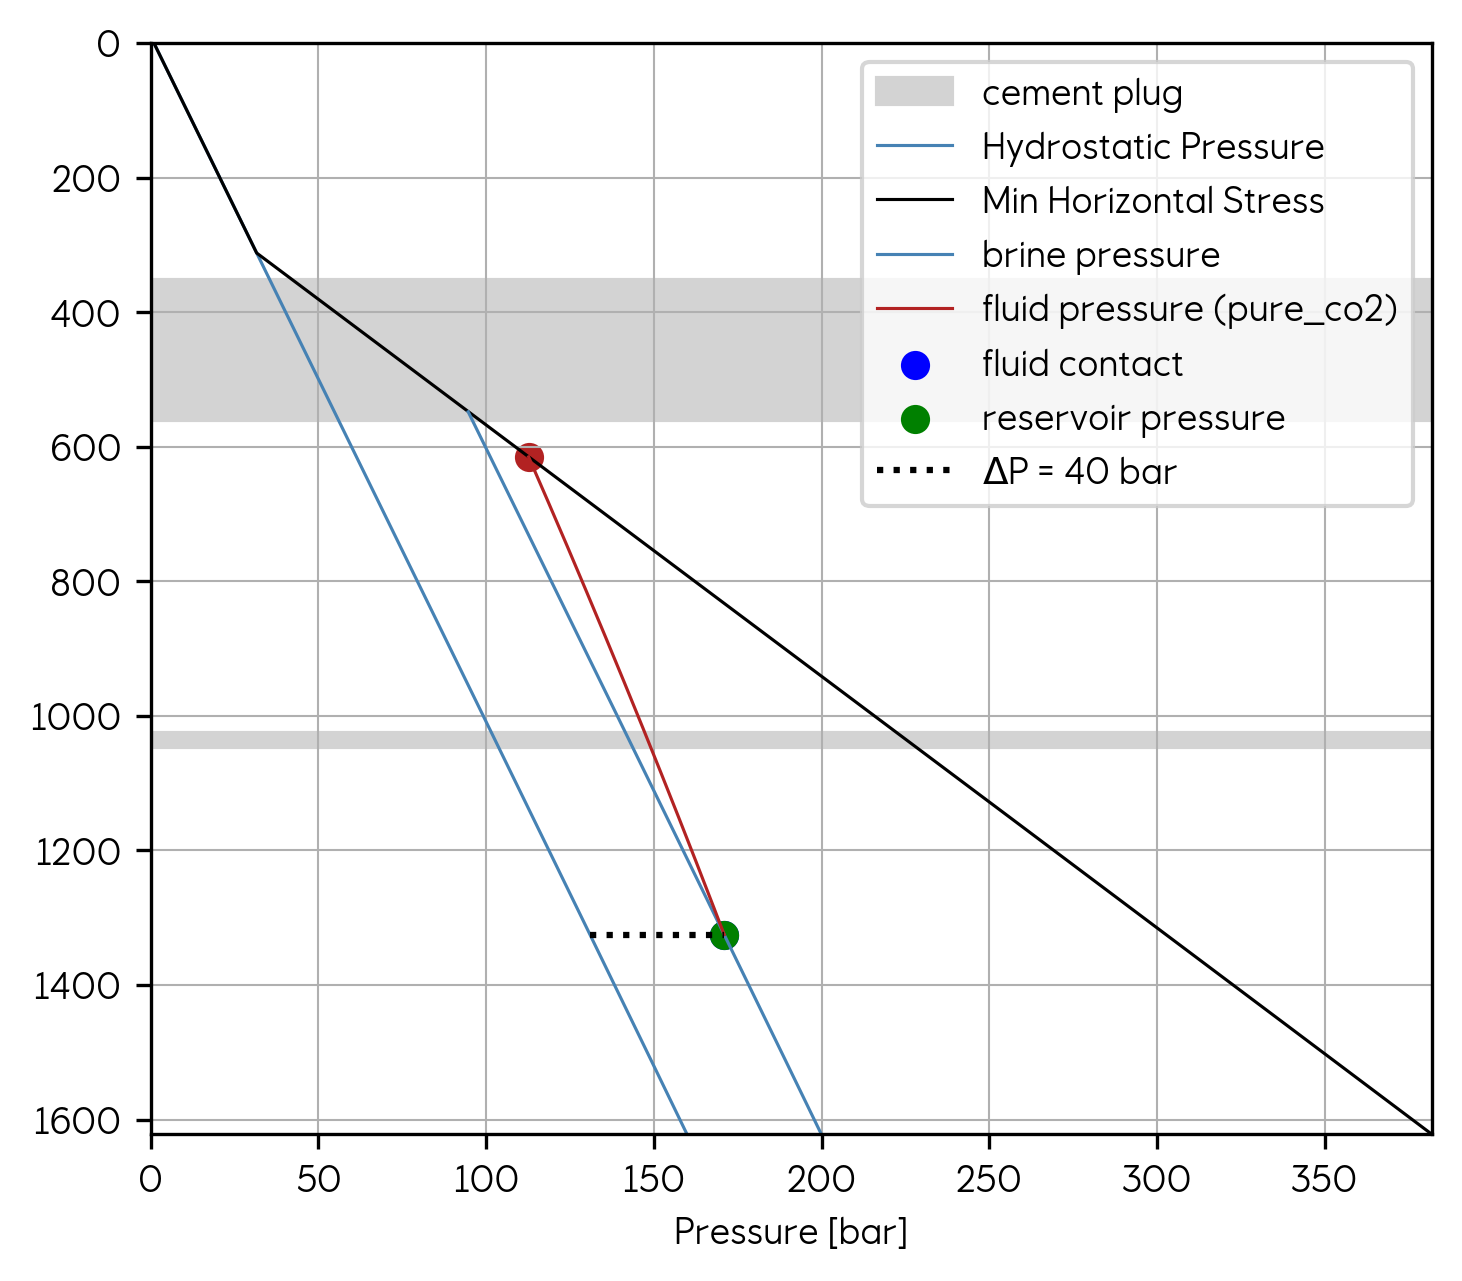

In [81]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )



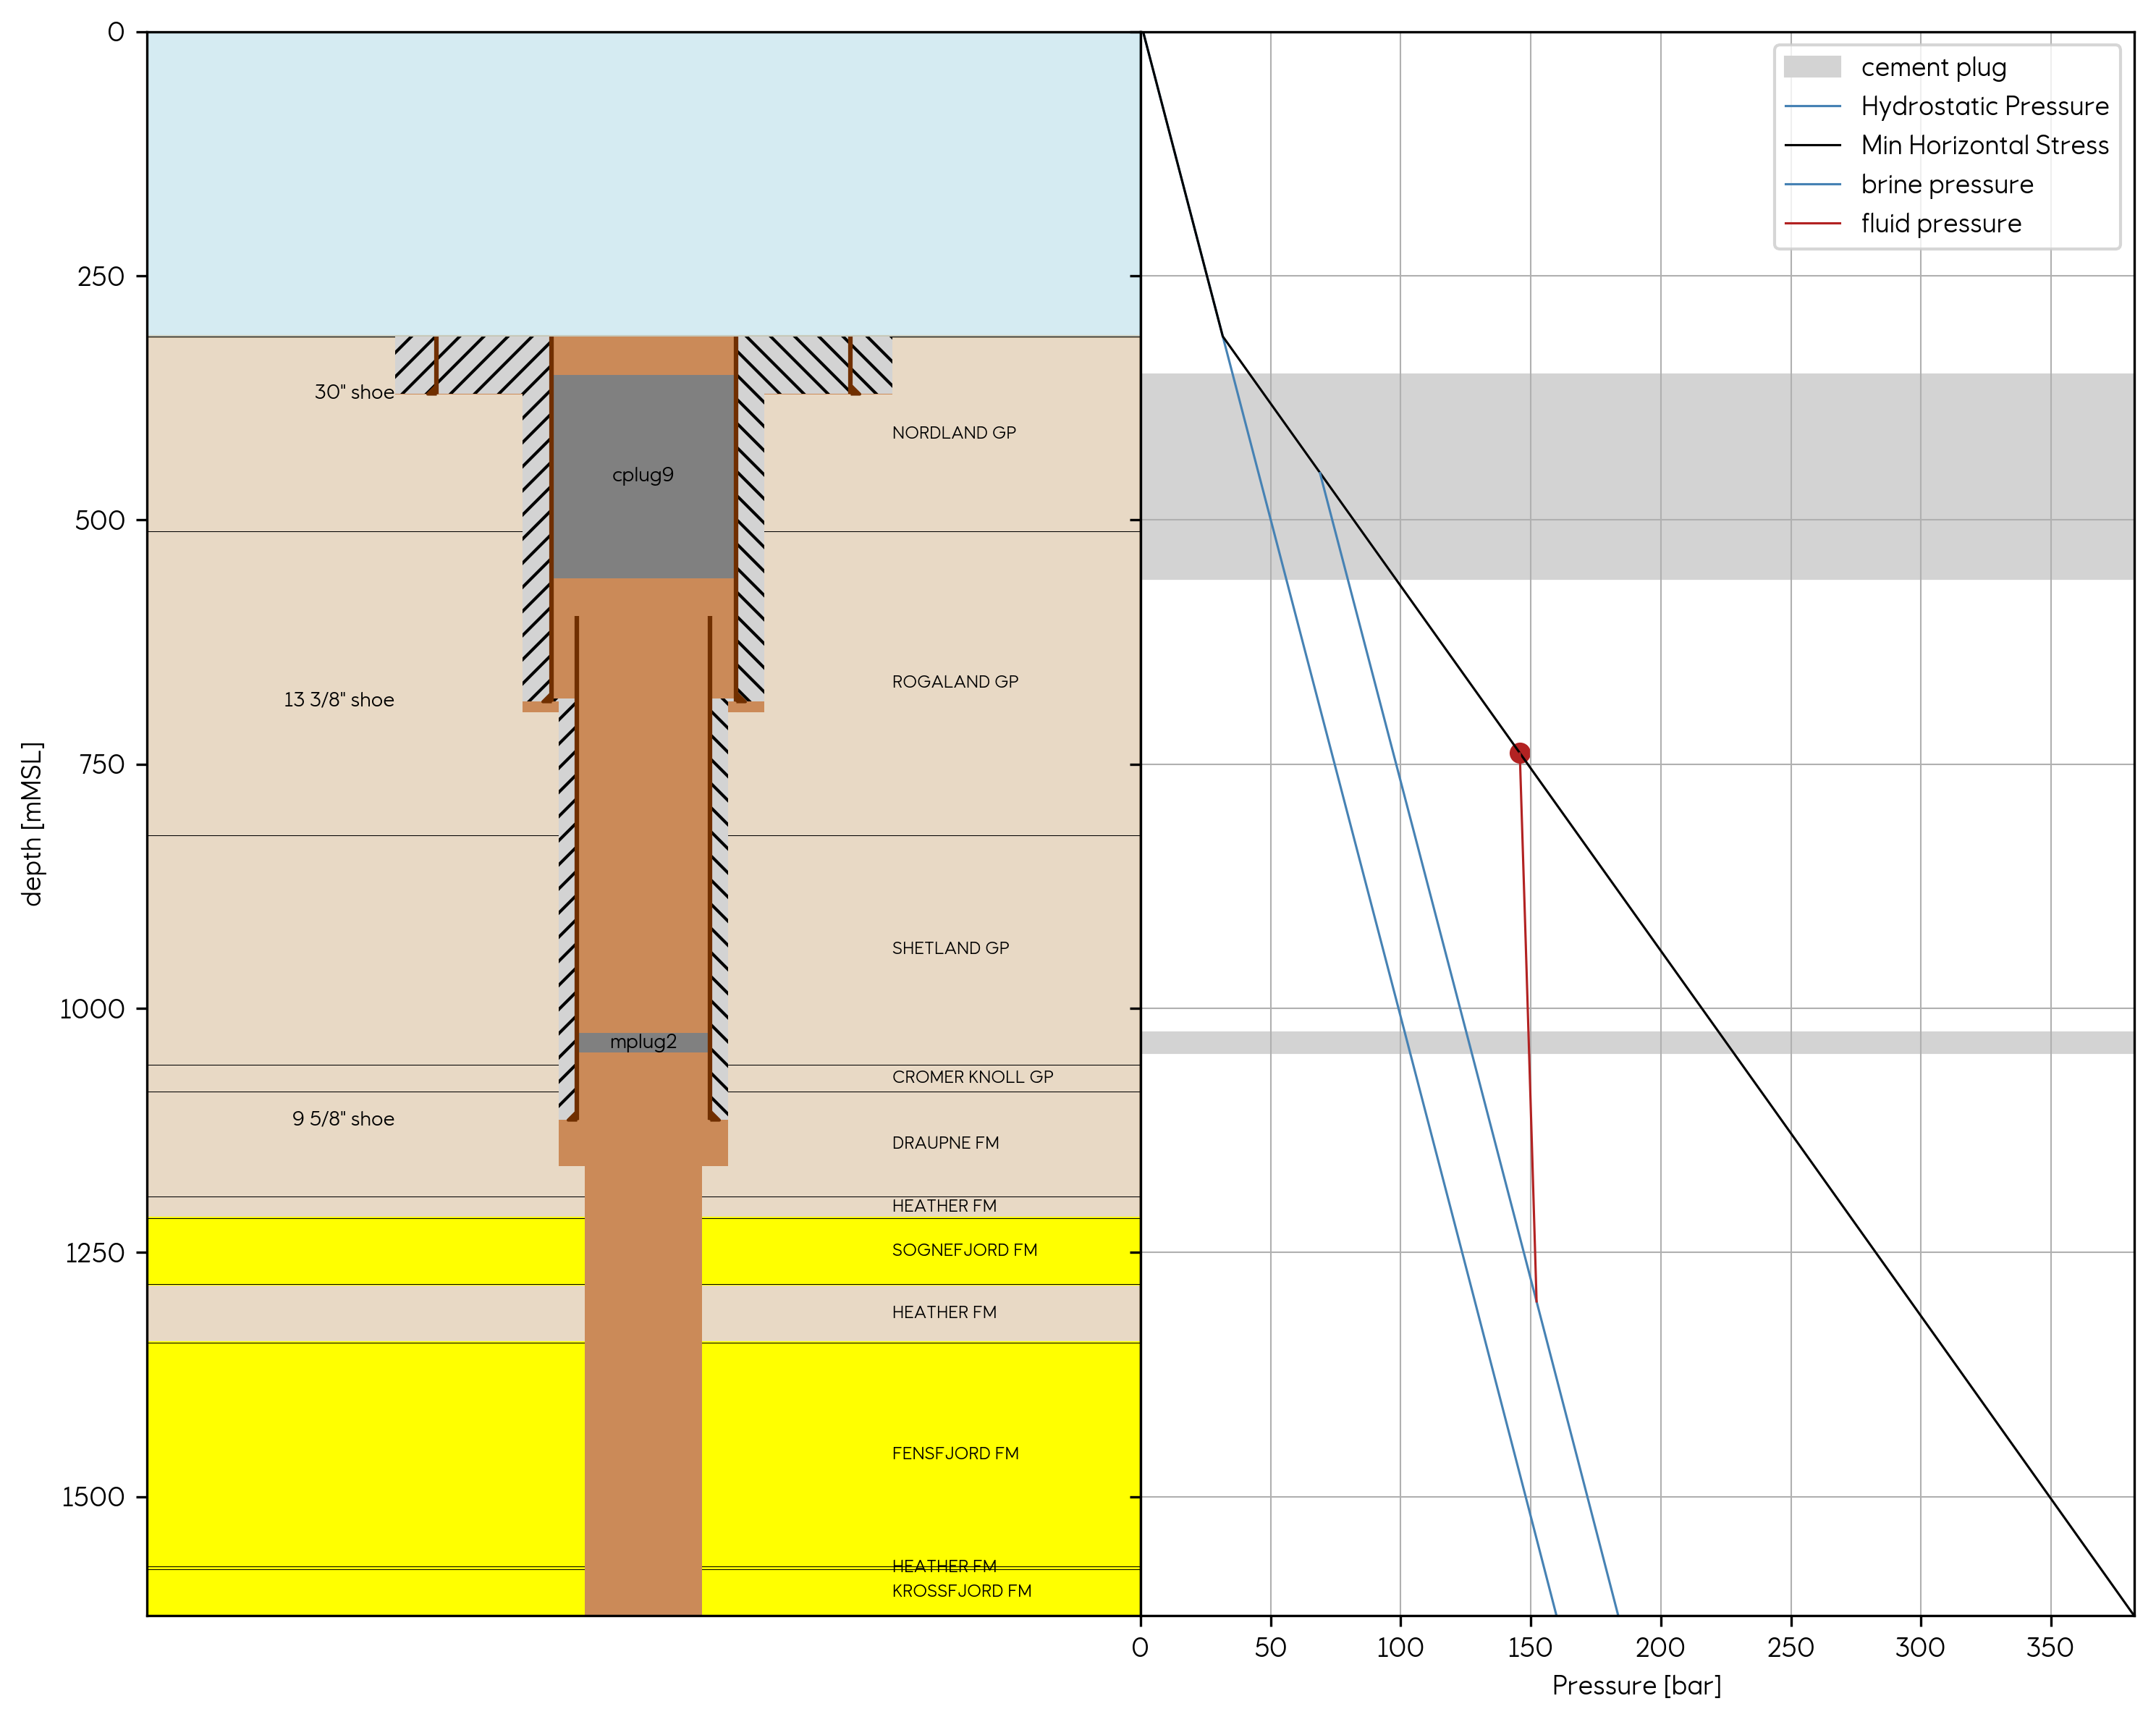

In [57]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )


fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [52]:
my_pressure.add_scenario(scenario_name='test1', fluid_type='pure_co2', from_resrvr=True, z_fluid_contact = 1200)

Computing pressure profile for scenario: test1


<Axes: xlabel='Pressure [bar]'>

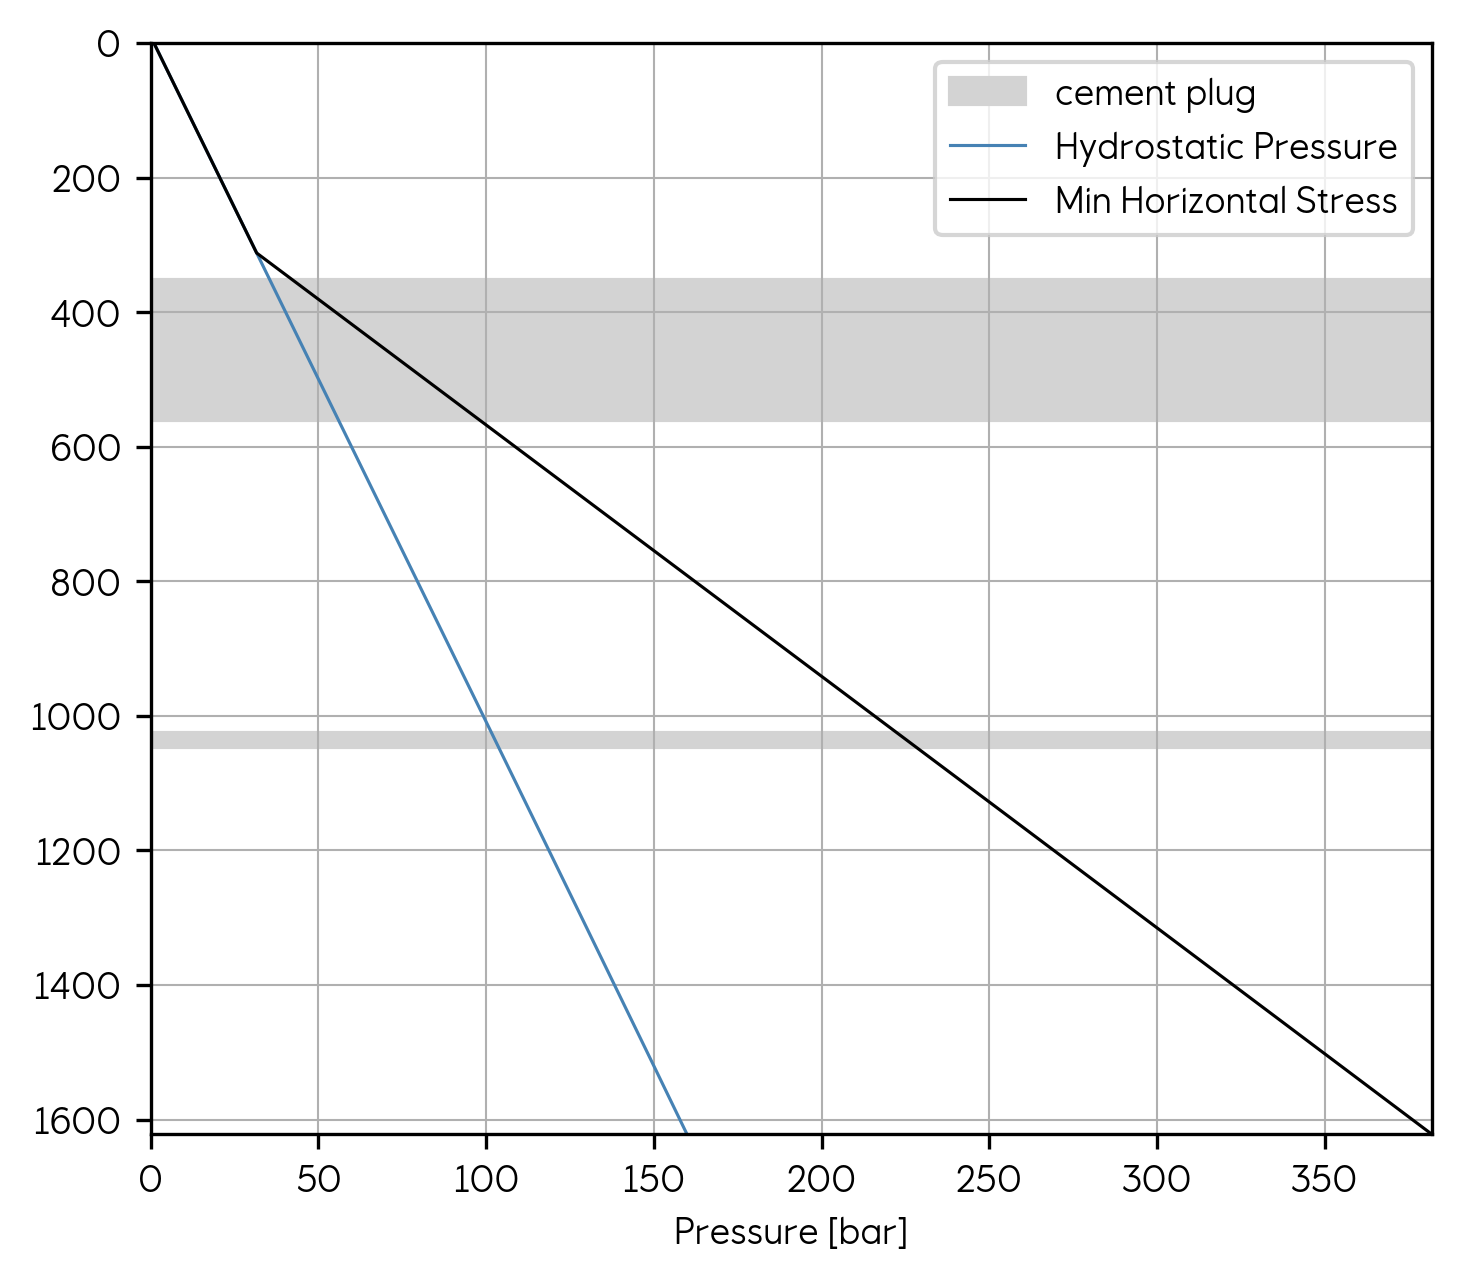

In [59]:
rcParams['figure.dpi'] = 300

width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True, #plot fluid contact
              plot_resrv=True, #plot reservoir
              plot_delta_p=True #plot delta p
              )



In [55]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,test1,True,738.408674,145.7922,1100,150,1300,152.245641,23.701228,methane,100% CH4,None


If depth of fluid contact is provided, by default Pressure class will calculate a pressure scenario with a hydrosatic gradient from the fluid contact to the surface

In [18]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       z_fluid_contact=well_csv['co2_datum'],
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')

Computing pressure profile for scenario: hydrostatic


In [19]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,hydrostatic,True,411.240043,58.200635,1282.5,126.834373,1282.5,126.834373,0,pure_co2,100% CO2,None


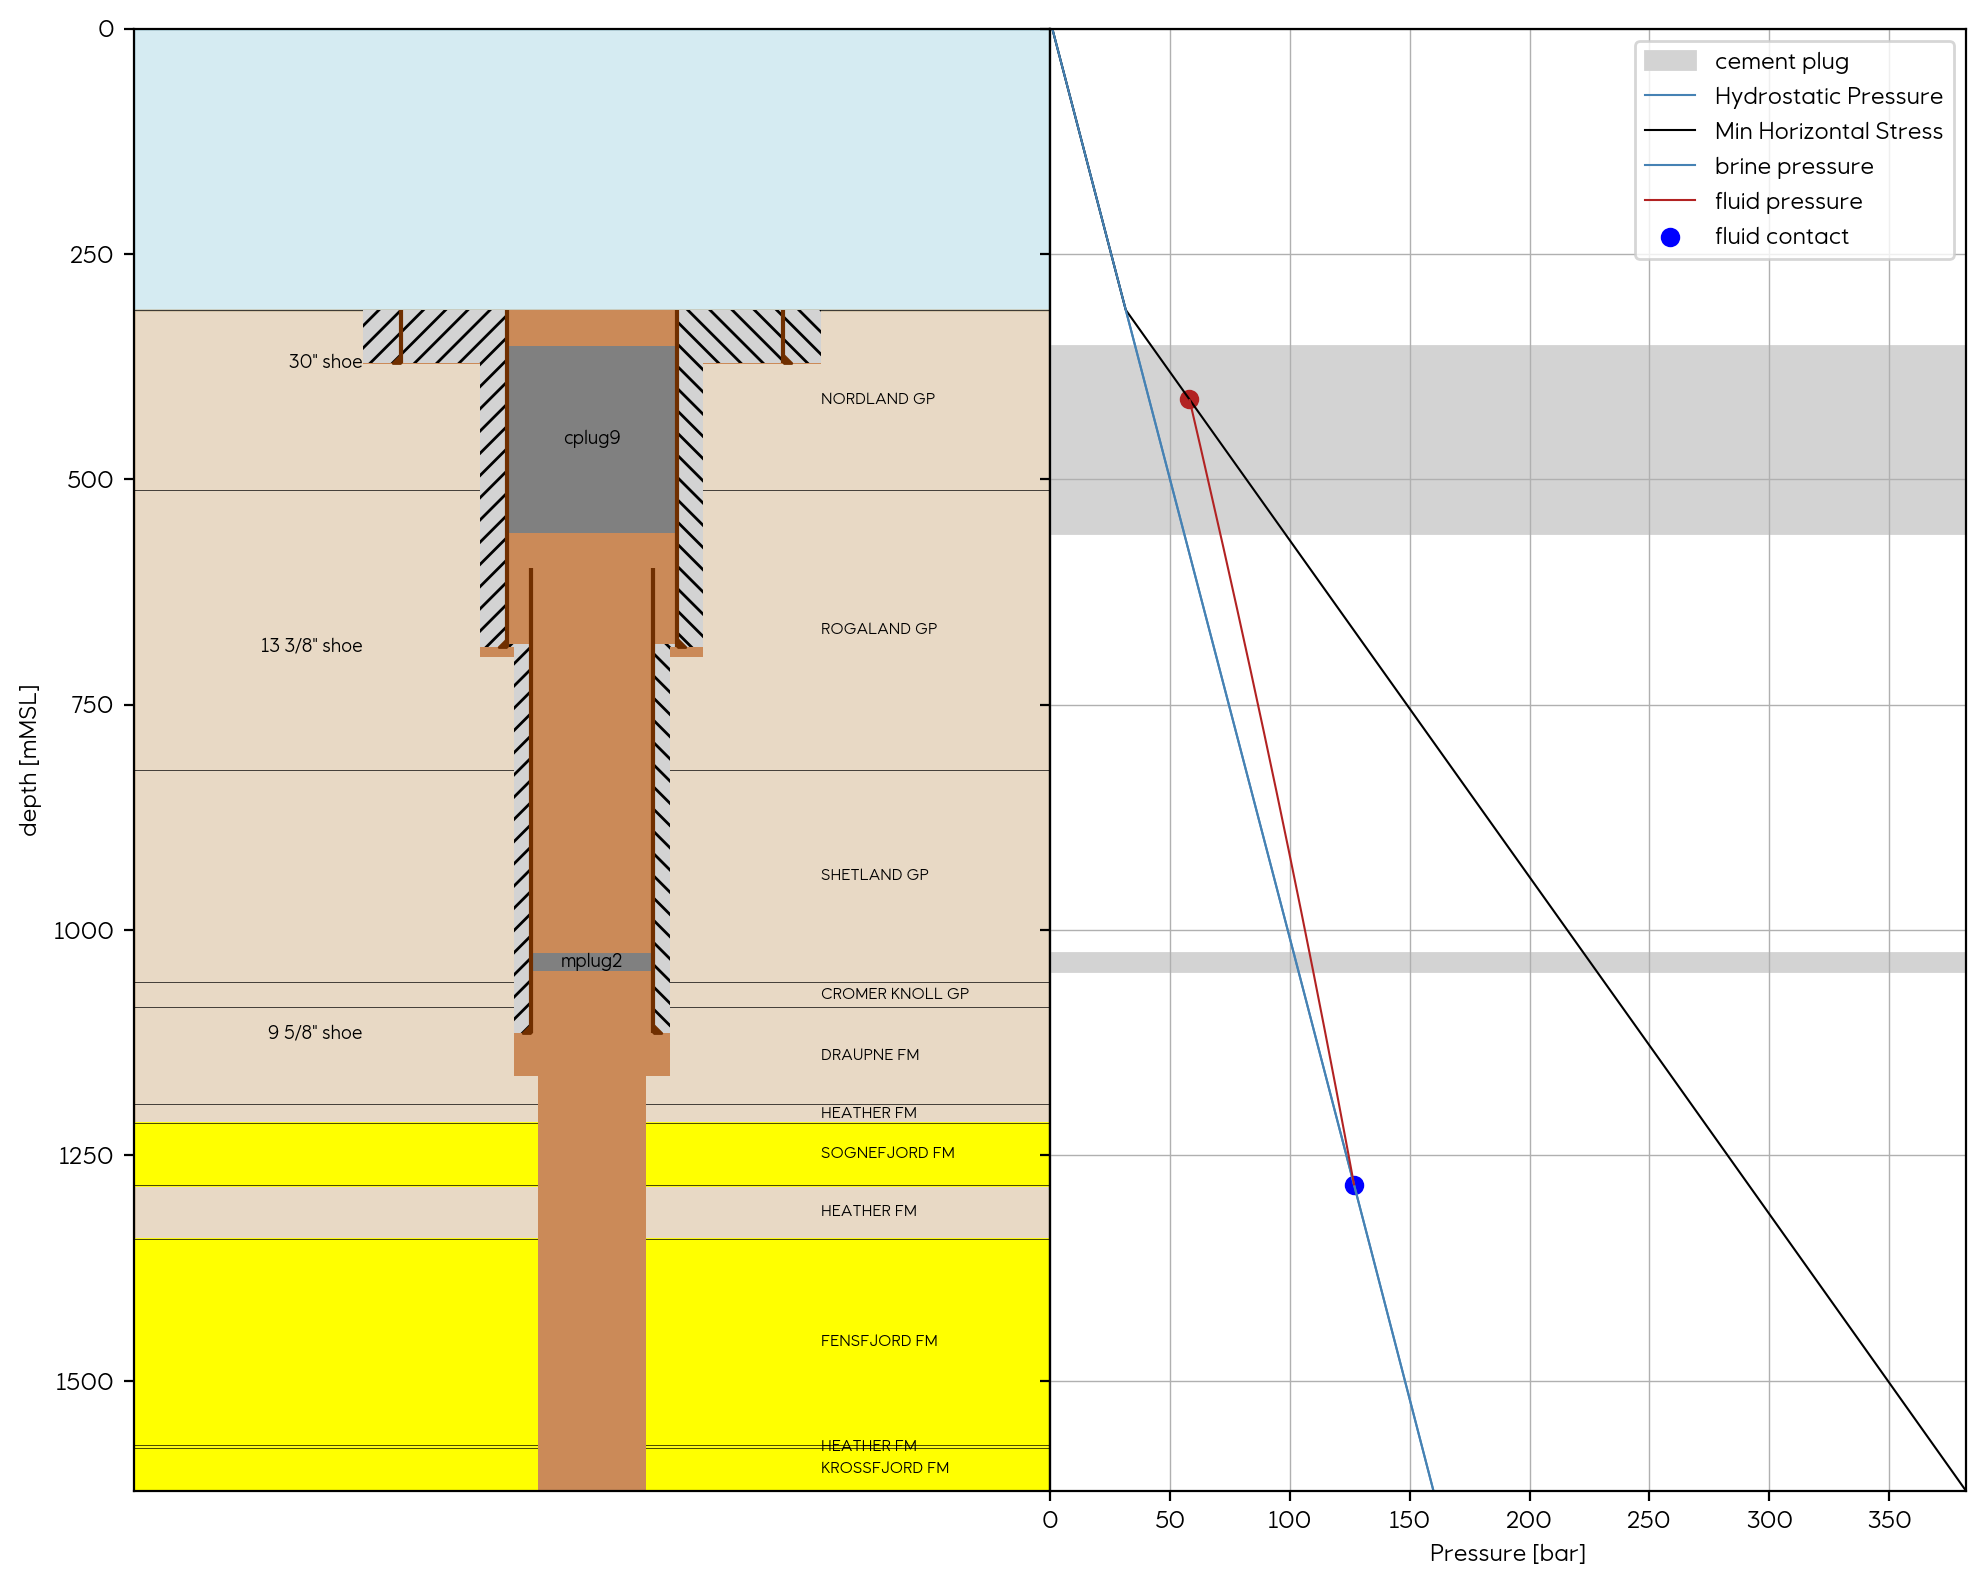

In [20]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True #plot fluid contact
              )


fig.tight_layout()
fig.subplots_adjust(wspace=0)

<Axes: xlabel='Pressure [bar]'>

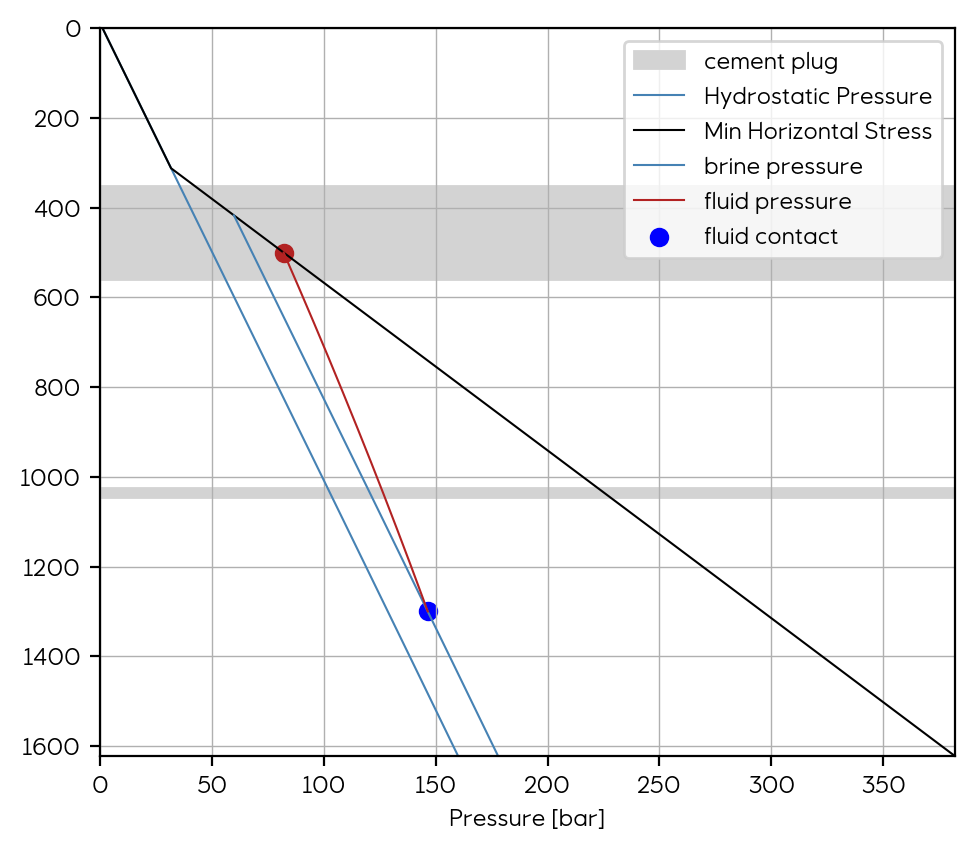

In [31]:
width_cm = 14 #cm
height_cm = 12 #cm

width = width_cm / 2.54
height = height_cm / 2.54

fig, ax = plt.subplots(1,1, figsize=(width, height))

plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth,
              plot_fluid_contact=True #plot fluid contact
              )



If other fluid compostions want to be added and compared, the user can pick between pure CO2, mixture1, mixture2 or pure methane, or provide its own specific gravity

In [21]:
my_pressure.add_scenario(scenario_name='mixture1', fluid_type='mixture1', from_resrvr=True)
my_pressure.add_scenario(scenario_name='methane', fluid_type='methane', from_resrvr=True)
my_pressure.add_scenario(scenario_name='sg_input', fluid_type='my_gas', from_resrvr=True, specific_gravity=300/1e3)

Computing pressure profile for scenario: mixture1
Computing pressure profile for scenario: methane
Computing pressure profile for scenario: sg_input


In [22]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,hydrostatic,True,411.240043,58.200635,1282.5,126.834373,1282.5,126.834373,0,pure_co2,100% CO2,NaN
1,mixture1,True,423.539595,61.493624,1282.5,126.834373,1282.5,126.834373,0,mixture1,"96% CO2, 0.4% H, 1% Ar, 0.82% N, 1.78% CH4",NaN
2,methane,True,644.928804,120.767045,1282.5,126.834373,1282.5,126.834373,0,methane,100% CH4,NaN
3,sg_input,True,591.678105,106.510427,1282.5,126.834373,1282.5,126.834373,0,my_gas,None,0.3


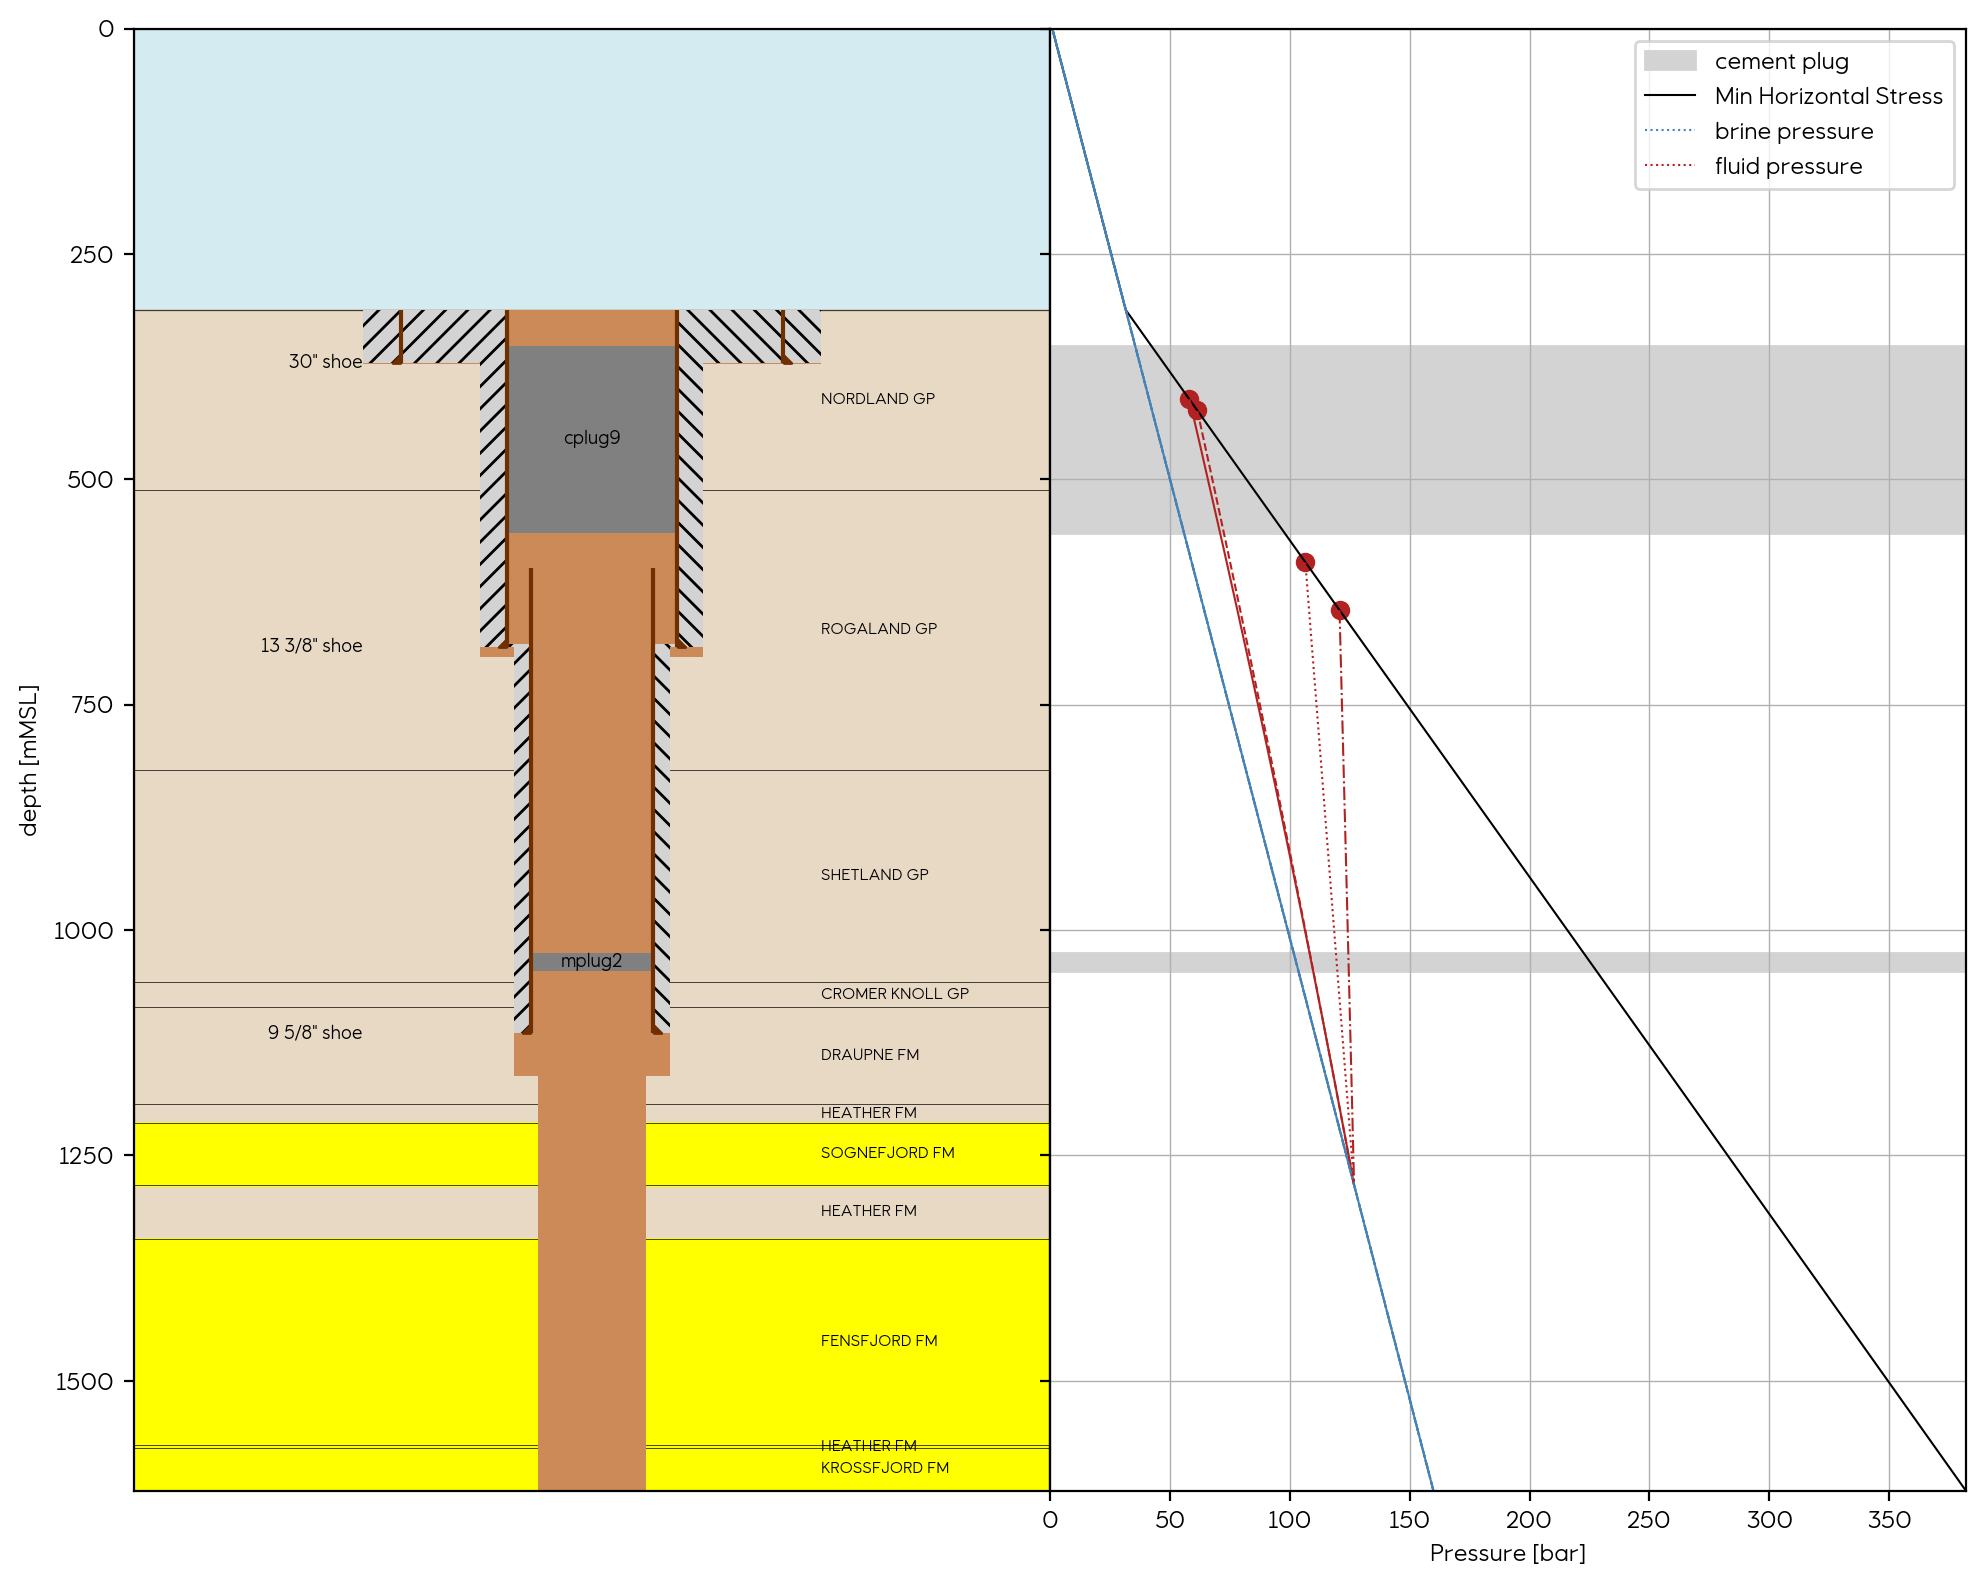

In [23]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
            #   plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )


fig.tight_layout()
fig.subplots_adjust(wspace=0)

If simple input scenarios are provided in the input_scenarios argument, these will be computed

In [24]:


my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       input_scenarios=well_csv['reservoir_pressure'],
                       z_fluid_contact=well_csv['co2_datum'],
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')



Computing pressure profile for scenario: RP1
p_delta=91.0
Computing pressure profile for scenario: RP2
p_delta=20.0
Computing pressure profile for scenario: RP3


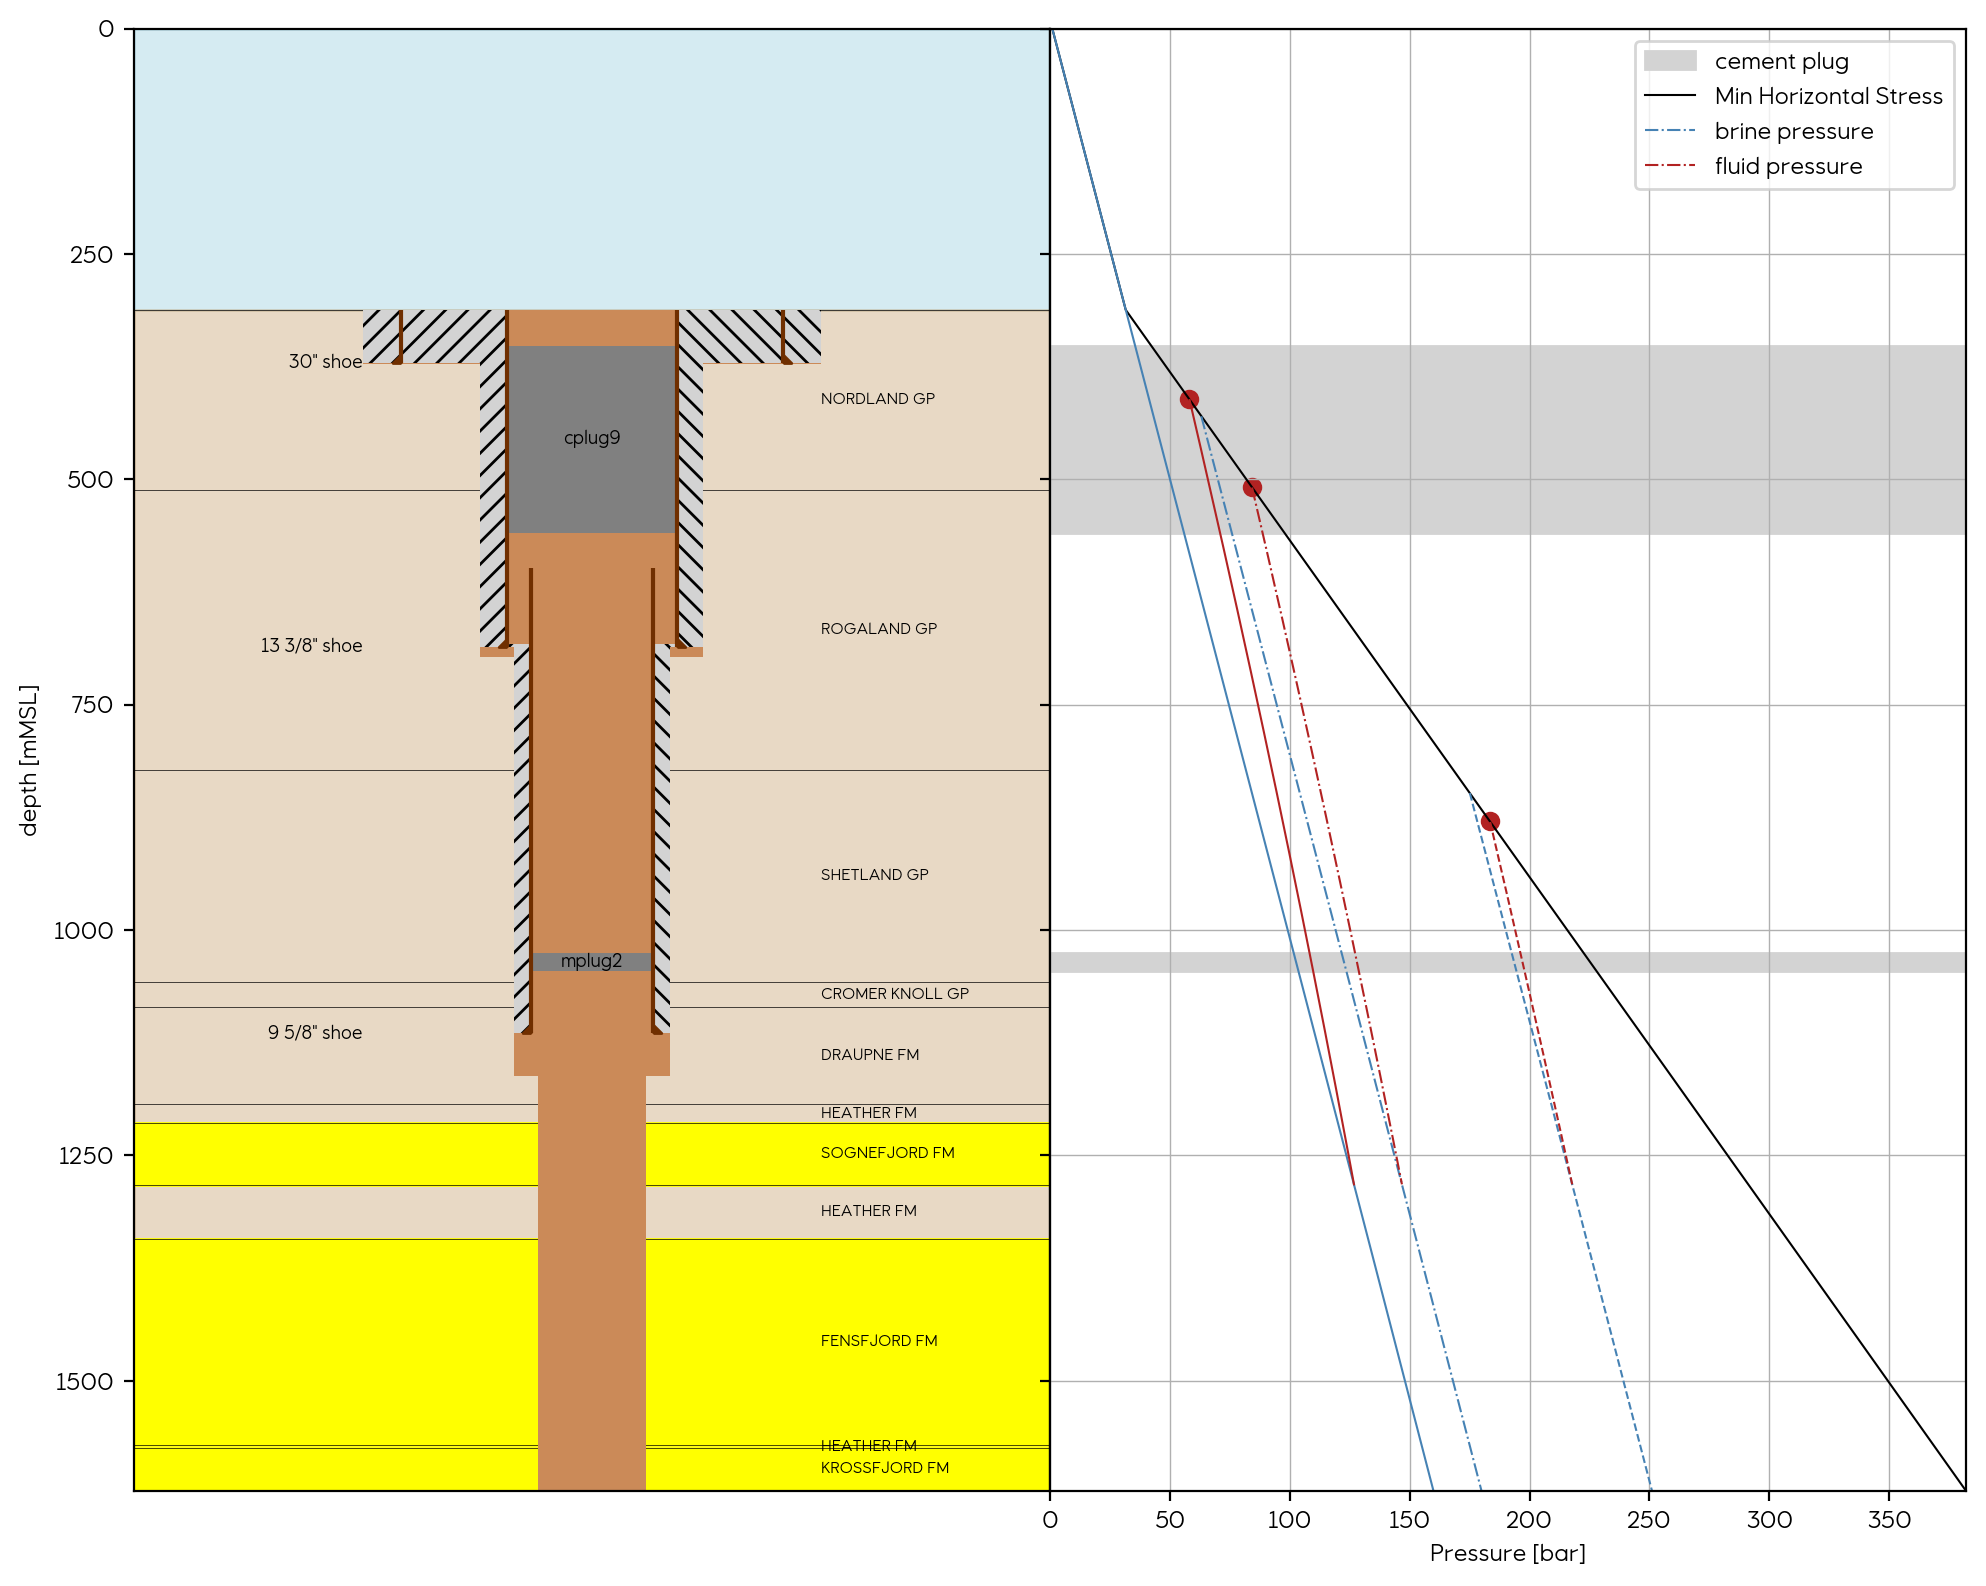

In [25]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
            #   plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )


fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [26]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,RP1,True,411.240043,58.200635,1282.5,126.834373,1282.5,126.834373,0.0,pure_co2,100% CO2,None
1,RP2,True,879.396770,183.528345,1282.5,217.834373,1282.5,217.834373,91.0,pure_co2,100% CO2,None
2,RP3,True,508.572015,84.259941,1282.5,146.834373,1282.5,146.834373,20.0,pure_co2,100% CO2,None


### 2. Create a pressure scenario

Create a pressure scenario providing only the **MSAD** (the `from_resrv` flag has to be False )

In [27]:
my_pressure = Pressure(sf_depth_msl=well_csv['well_header']['sf_depth_msl'],
                       well_td_rkb=well_csv['well_header']['well_td_rkb'],
                       well_rkb=well_csv['well_header']['well_rkb'],
                       sf_temp=well_csv['well_header']['sf_temp'],
                       geo_tgrad=well_csv['well_header']['geo_tgrad'],
                       fluid_type='pure_co2',
                       default_hs_scenario=False,
                    #    z_fluid_contact=1300,
                       pvt_path='../src/WellClass/libs/pvt/pvt_constants')

my_pressure.add_scenario(scenario_name='plug', from_resrvr=False, z_MSAD = 500, z_fluid_contact = 1300)



Computing pressure profile for scenario: plug


In [28]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,plug,False,500,81.964883,1300,146.397203,1300,146.397203,17.852791,pure_co2,100% CO2,None


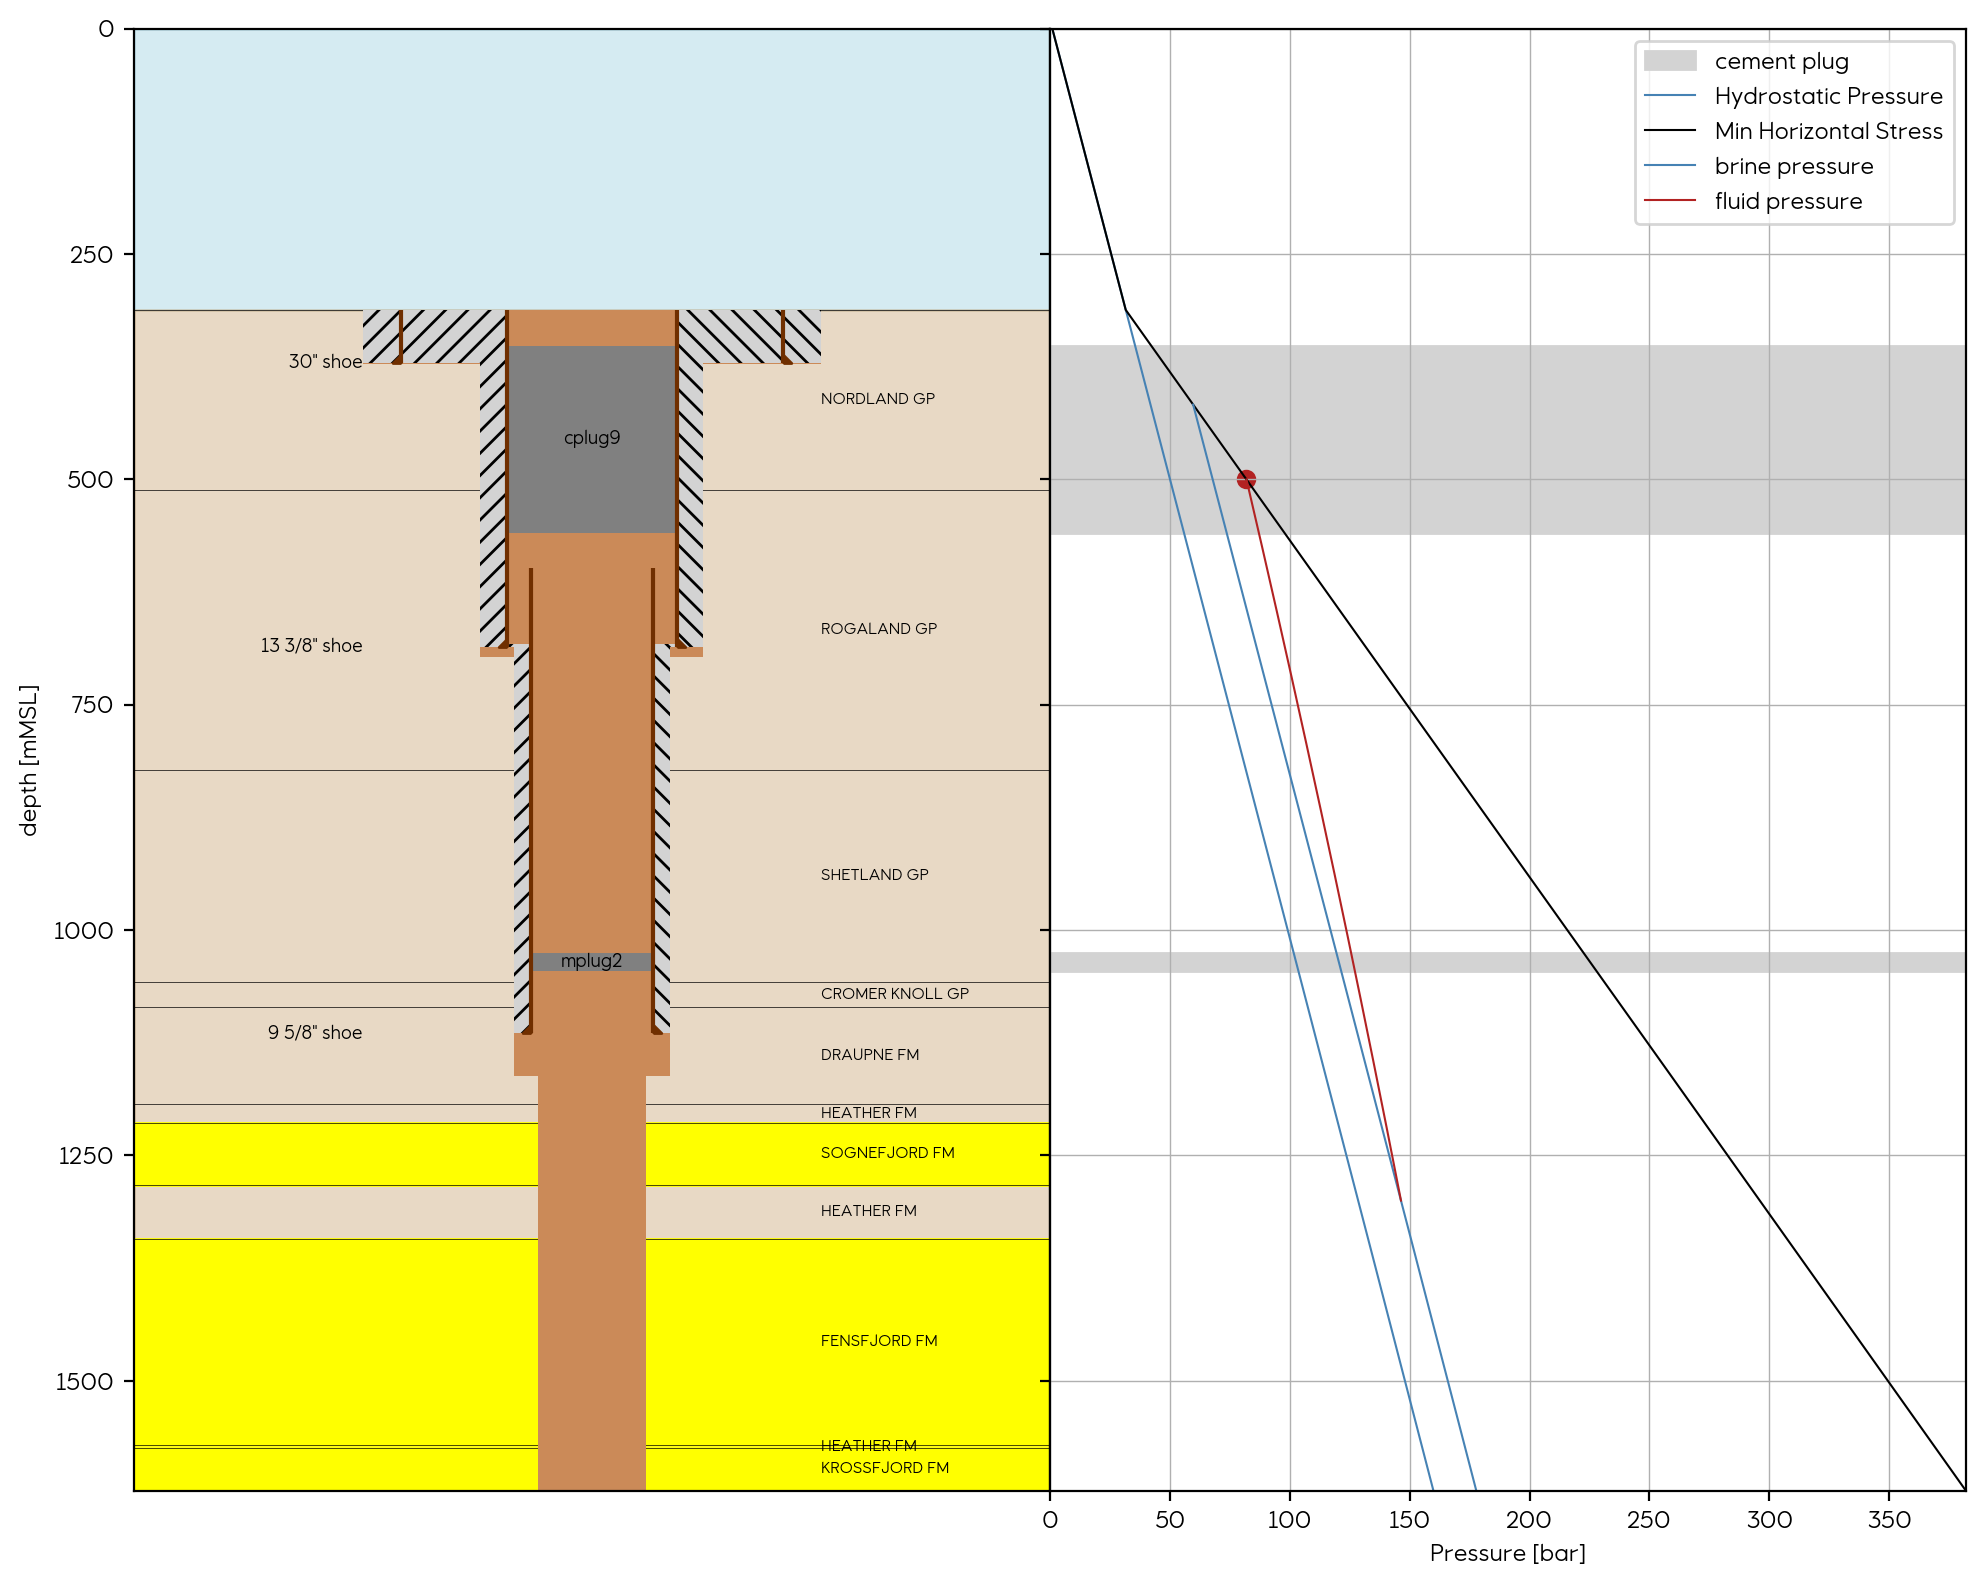

In [29]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
              plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )

# ax2.scatter(139.99502221055212, 1100)


fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [29]:
my_pressure.add_scenario(scenario_name='min depl.', from_resrvr=True, z_resrv = 1215.75, p_resrv = 120)
my_pressure.add_scenario(scenario_name='mid depl A', from_resrvr=True, z_resrv = 1215.75, p_resrv = 100)
my_pressure.add_scenario(scenario_name='mid depl B', from_resrvr=True, z_resrv = 1215.75, p_resrv = +(120+50)/2)
my_pressure.add_scenario(scenario_name='max depl.', from_resrvr=True, z_resrv = 1215.75, p_resrv = 50)

my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: min depl.
Lines do not intersect
Computing pressure profile for scenario: mid depl A
Lines do not intersect
Computing pressure profile for scenario: mid depl B
Lines do not intersect
Computing pressure profile for scenario: max depl.
Lines do not intersect


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta,fluid_type,fluid_composition,specific_gravity
0,plug,False,450.000000,68.577996,1500.00,150.000095,1500.00,150.000095,1.940422,pure_co2,100% CO2,None
1,min depl.,True,400.863352,55.422477,1215.75,120.000000,1215.75,120.000000,-0.308395,pure_co2,100% CO2,None
2,mid depl A,True,342.272872,39.736419,1215.75,100.000000,1215.75,100.000000,-20.308395,pure_co2,100% CO2,None
3,mid depl B,True,342.275076,39.737009,1215.75,85.000000,1215.75,85.000000,-35.308395,pure_co2,100% CO2,None
4,max depl.,True,341.992014,39.661228,1215.75,50.000000,1215.75,50.000000,-70.308395,pure_co2,100% CO2,None


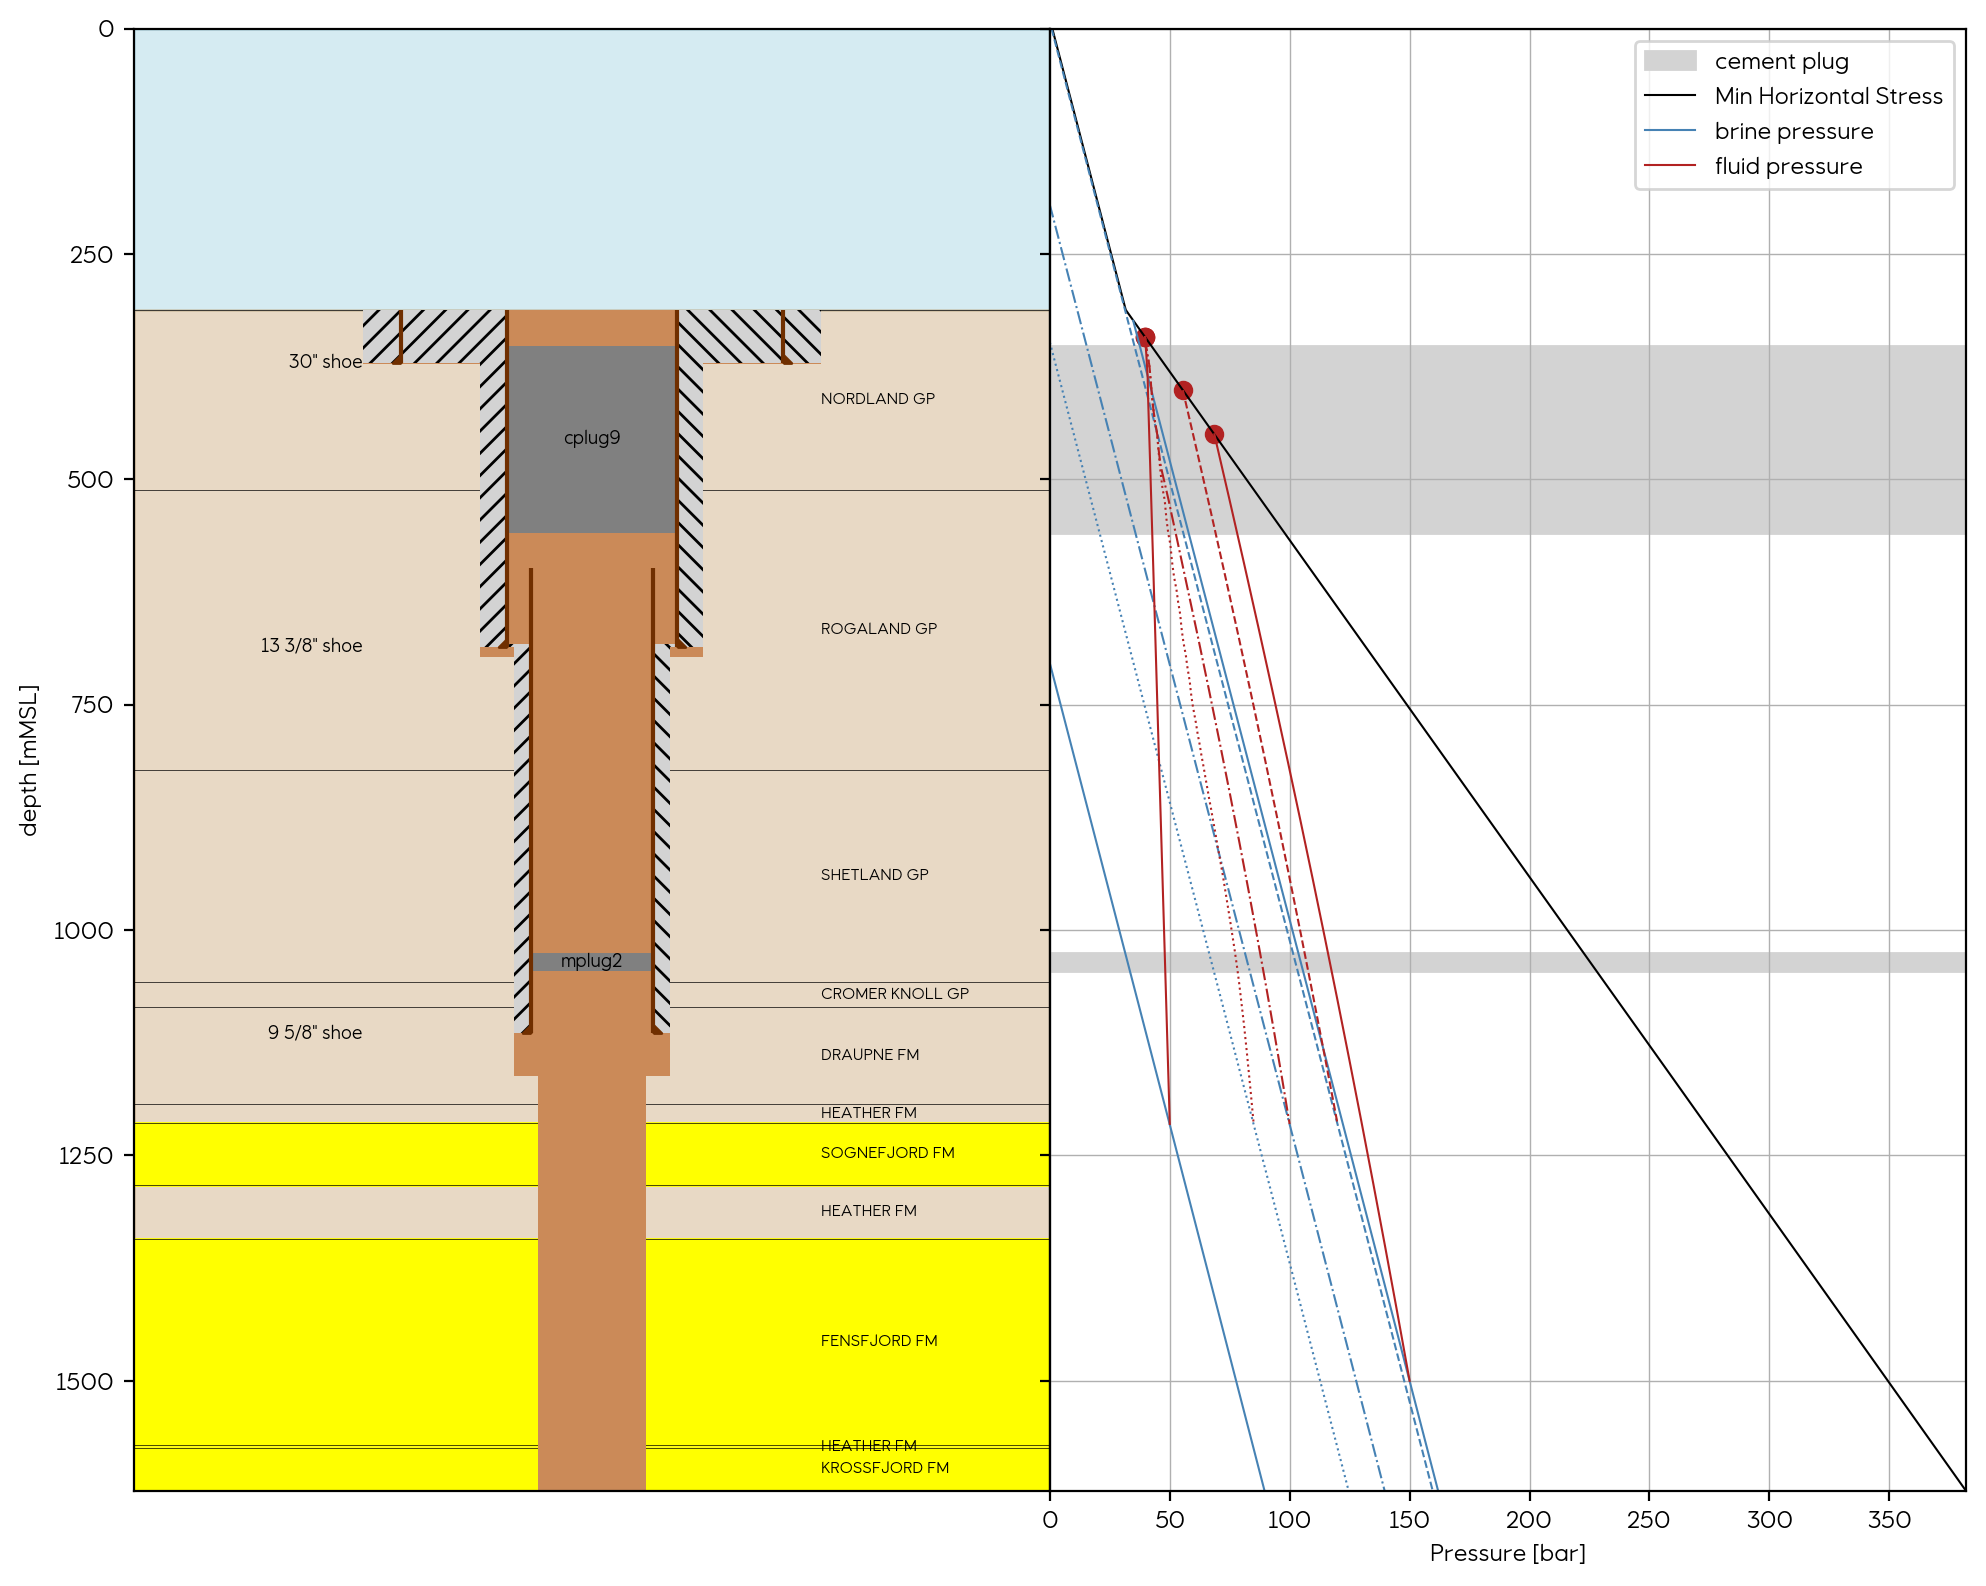

In [30]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
            #   plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )

# ax2.scatter(139.99502221055212, 1100)


fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [42]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta
0,min depl.,True,400.863352,55.422477,1215.75,120.0,1215.75,120.0,-0.308395
1,mid depl A,True,342.272872,39.736419,1215.75,100.0,1215.75,100.0,-20.308395
2,mid depl B,True,342.275076,39.737009,1215.75,85.0,1215.75,85.0,-35.308395
3,max depl.,True,341.992014,39.661228,1215.75,50.0,1215.75,50.0,-70.308395


In [50]:
my_pressure.pvt_data['pure_co2']['metadata']['composition']

'100% CO2'

In [28]:
base_of_plug = my_well.barriers['bottom_msl'][0]

temperature_at_base_of_plug = np.interp(base_of_plug, my_pressure.init_curves['depth'], my_pressure.init_curves['temperature'])

print(f"Temperature at base of plug: {temperature_at_base_of_plug}")

# np.interp1d(my_pressure.init_curves.depth, my_pressure.init_curves.query('depth<=1600').pressure)(139.99502221055212)

Temperature at base of plug: 13.9


In [29]:
my_pressure.fluid_type

'pure_co2'

In [101]:
temperature_at_reservoir = np.interp(1215.75, my_pressure.init_curves['depth'], my_pressure.init_curves['temperature'])


(1.0, 200.0)

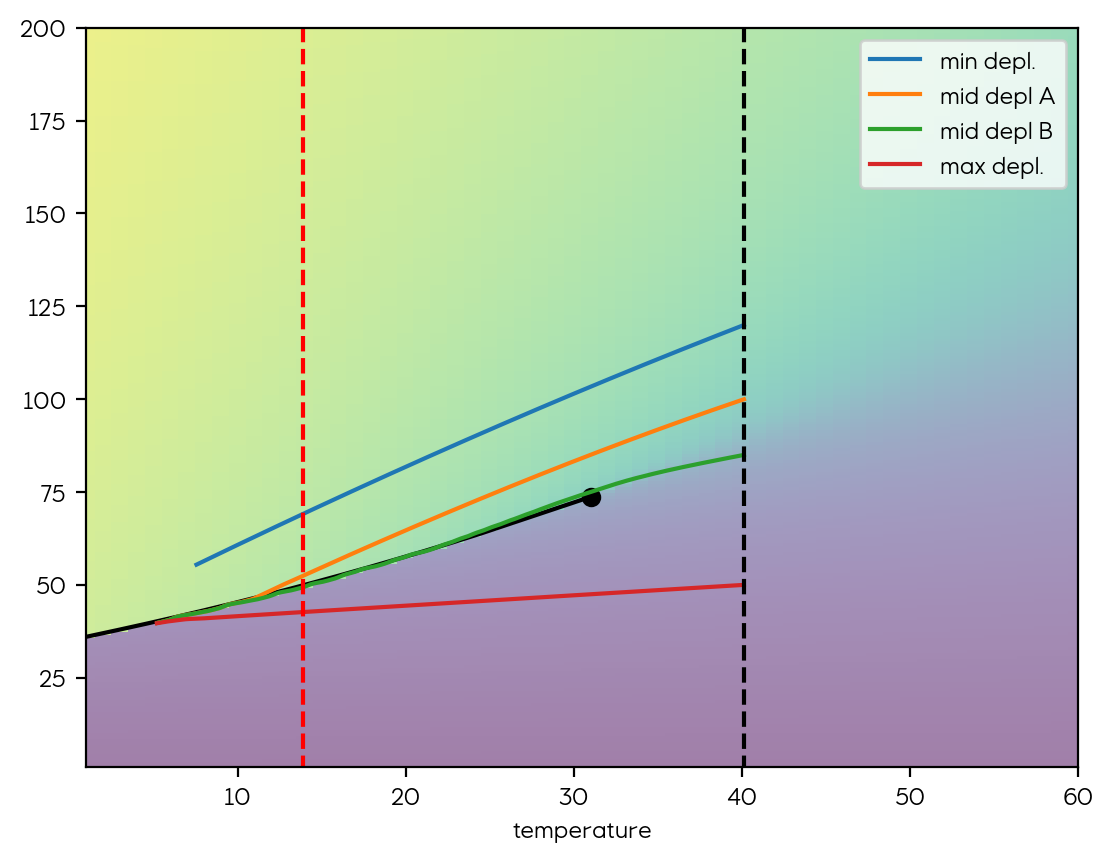

In [32]:

t = my_pressure.pvt_data['temperature']
p = my_pressure.pvt_data['pressure']
rho_co2 = my_pressure.pvt_data['pure_co2']['rho']

fig, ax = plt.subplots()



#Plot density colormap
rho_pcm = ax.pcolormesh(t, p, rho_co2, alpha=0.5)


#Plot phase boundary and critical point
t_co2 = np.array([-50,-48.35,-46.69,-45.04,-43.38,-41.73,-40.08,-38.42,-36.77,-35.11,-33.46,-31.81,-30.15,-28.5,-26.84,-25.19,-23.53,-21.88,-20.23,-18.57,-16.92,-15.26,-13.61,-11.96,-10.3,-8.65,-6.99,-5.34,-3.69,-2.03,-0.38,1.28,2.93,4.58,6.24,7.89,9.55,11.2,12.86,14.51,16.16,17.82,19.47,21.13,22.78,24.43,31.05])
p_co2 = np.array([6.8,7.27,7.77,8.29,8.83,9.4,10,10.63,11.28,11.97,12.68,13.43,14.21,15.02,15.87,16.75,17.66,18.62,19.61,20.64,21.7,22.81,23.96,25.15,26.38,27.66,28.98,30.34,31.76,33.21,34.72,36.28,37.89,39.54,41.25,43.01,44.83,46.7,48.63,50.61,52.65,54.75,56.91,59.12,61.4,63.75,73.76])
ax.plot(t_co2, p_co2, color='k', lw=1.5, label = r'$CO_2$ phase env.')
ax.scatter(t_co2.max(), p_co2.max(), c='k')

for scenario in my_pressure.scenario_manager.scenarios.keys():
    my_pressure.scenario_manager.scenarios[scenario].init_curves.plot(x='temperature', y='fluid_pressure', ax=ax, label=scenario)

ax.vlines(temperature_at_base_of_plug, 0, 200, color='r', linestyle='--', label='Plug temperature')
ax.vlines(temperature_at_reservoir, 0, 200, color='k', linestyle='--', label='Plug temperature')

ax.set_xlim(1, 60)
ax.set_ylim(1, 200)


In [51]:
my_pressure.scenario_manager.scenarios['min depl.'].init_curves

,depth,temperature,hydrostatic_pressure,min_horizontal_stress,fluid_pressure,brine_pressure
0,0.0,4.00,1.013250,1.013250,NaN,-1.682160
1,1.0,4.00,1.111314,1.111314,NaN,-1.584096
2,2.0,4.00,1.209379,1.209379,NaN,-1.486031
3,3.0,4.00,1.307444,1.307444,NaN,-1.387966
4,4.0,4.00,1.405510,1.405510,NaN,-1.289899
...,...,...,...,...,...,...
3657,3657.0,137.80,353.701424,920.678924,NaN,350.967625
3658,3658.0,137.84,353.794174,920.941174,NaN,351.060363
3659,3659.0,137.88,353.886921,921.203421,NaN,351.153097
3660,3660.0,137.92,353.979666,921.465666,NaN,351.245829


In [29]:
my_pressure.add_scenario(scenario_name='plug2', from_resrvr=False, z_MSAD = 450, p_delta = 0)
my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: plug2


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta
0,plug2,False,450,68.577996,1300,136.184698,1300,136.184698,7.640286


Create a pressure scenario providing only the **delta Pressure +/-** and depth **fluid_contact**. The code assumes the reservoir depth is the same as the `co2_datum` (the `from_resrv` flag has to be True )

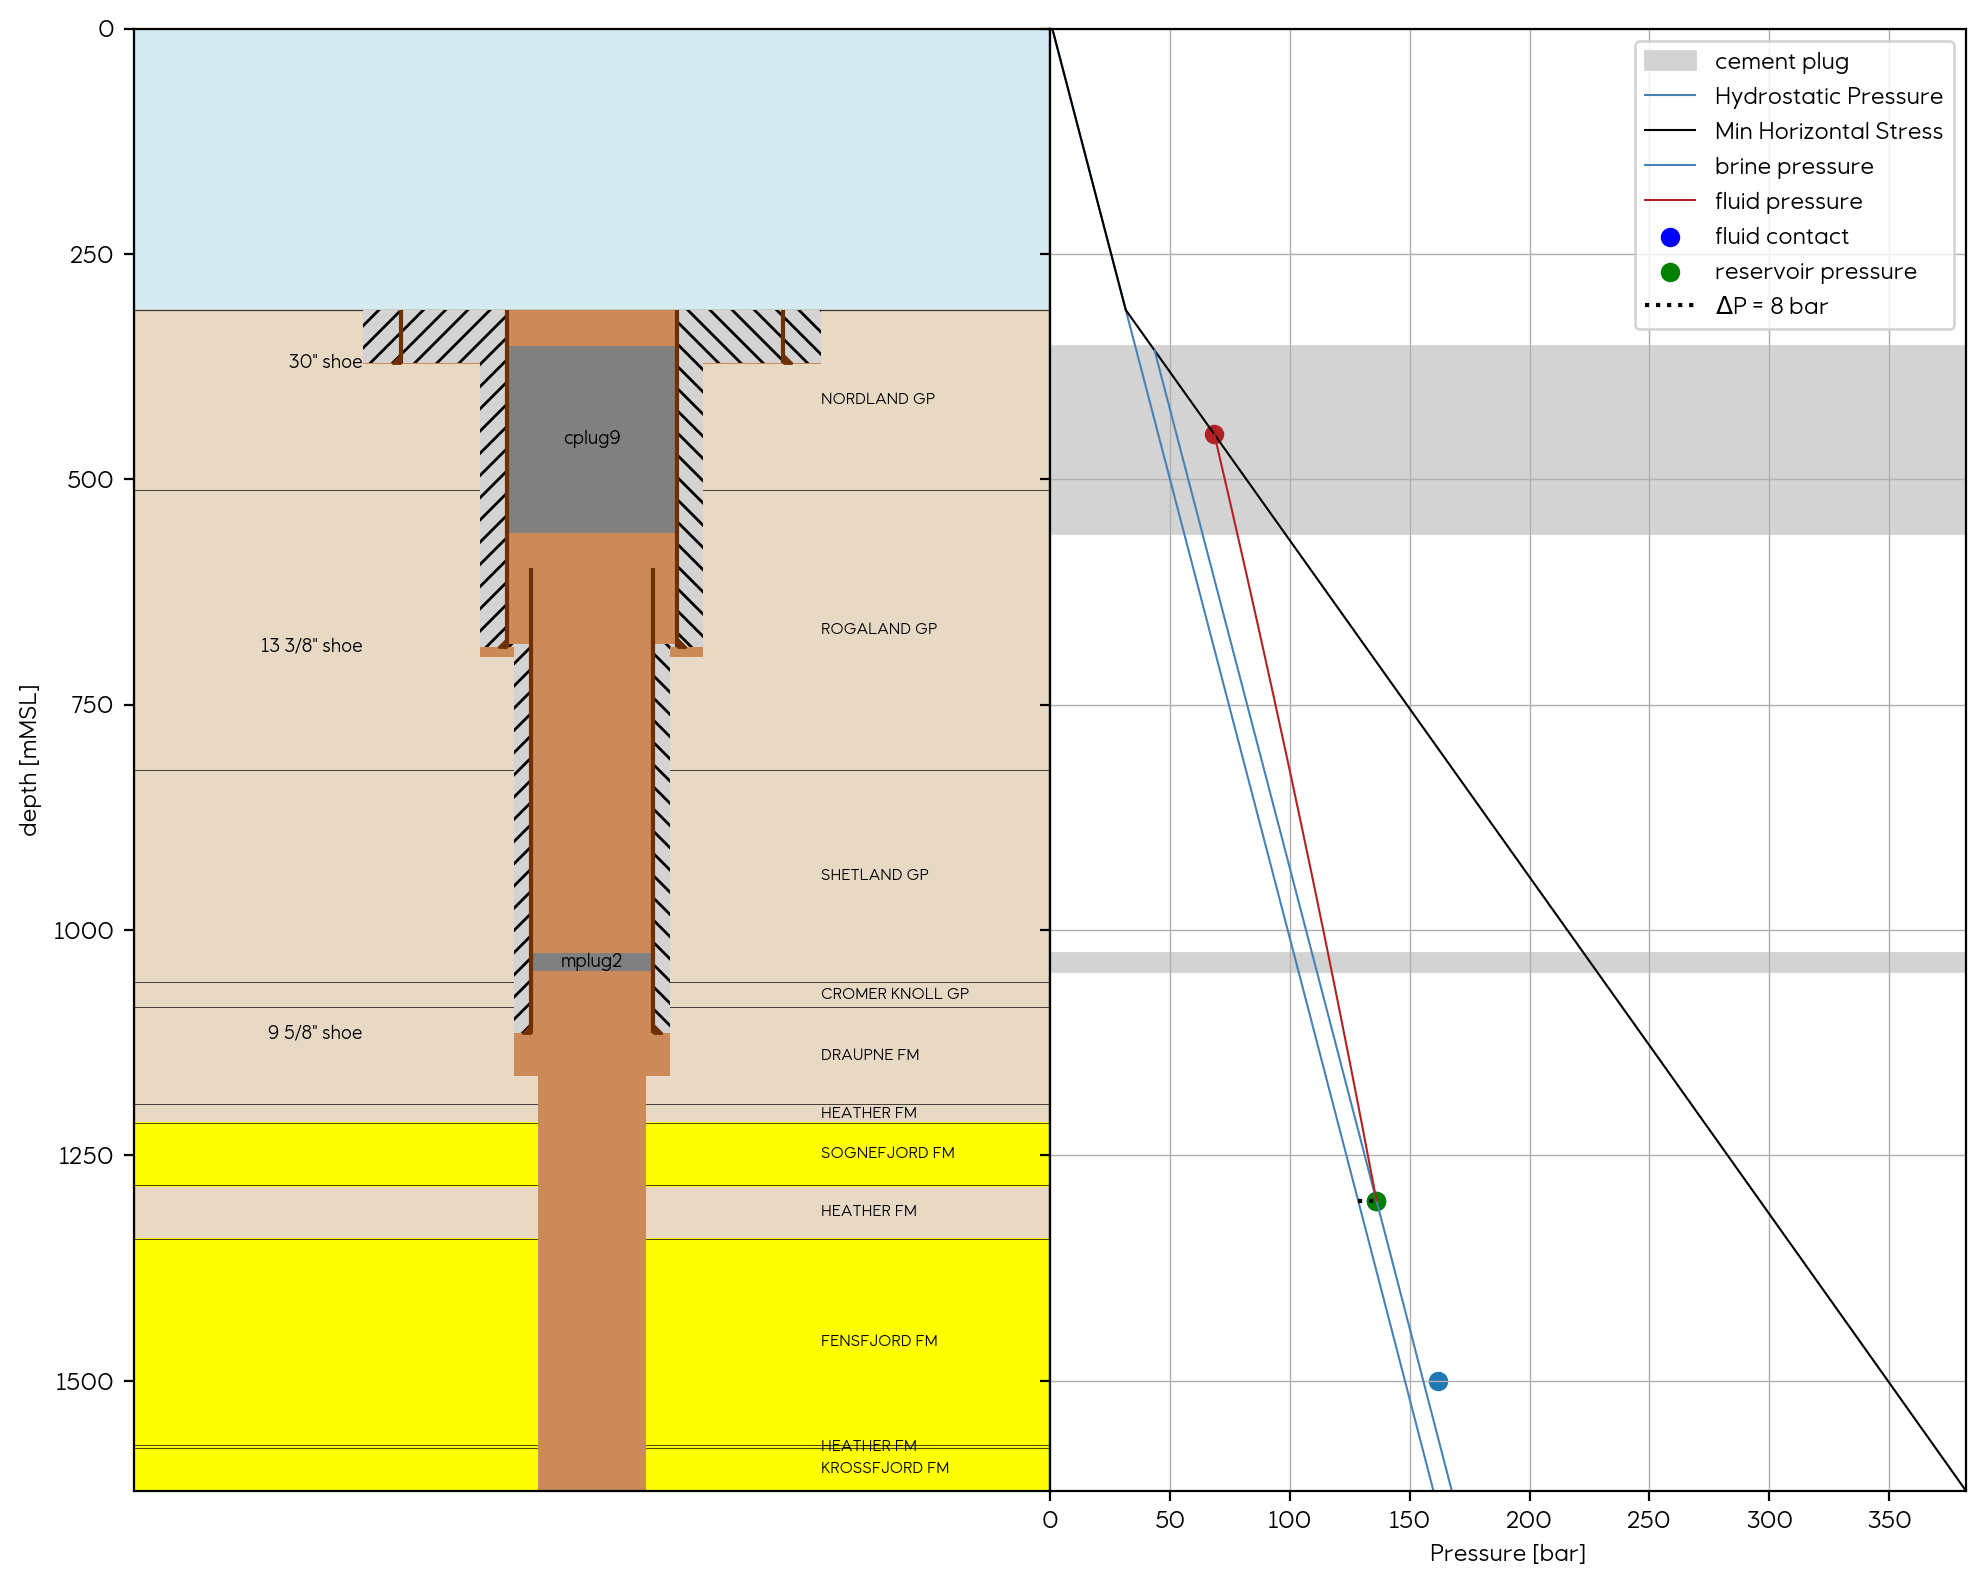

In [30]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
            #   plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )

ax2.scatter(161.73, 1500)
# ax2.scatter(139.99502221055212, 1100)


fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [45]:
my_pressure.add_scenario(scenario_name='test1', from_resrvr=True, p_delta = 25)

my_pressure.scenario_manager.get_scenarios_summary()

Computing pressure profile for scenario: test1


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta
0,plug,False,680.000000,130.156159,1500,197.097666,1500,197.097666,49.037993
1,test1,True,535.675351,91.516536,1300,153.544413,1300,153.544413,25.000000


Create a pressure scenario providing only the **delta Pressure +/-** at reservoir and the reservoir depth (the `from_resrv` flag has to be True )

In [40]:
my_pressure.add_scenario(scenario_name='test2', from_resrvr=True, p_delta = 10, z_resrv=1180)



Computing pressure profile for scenario: test2


In [41]:
my_pressure.scenario_manager.get_scenarios_summary()

,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta
0,plug,False,680.000000,130.156159,1500,197.097666,1500,197.097666,49.037993
1,test1,True,535.675351,91.516536,1300,153.544413,1300,153.544413,25.000000
2,test2,True,461.425649,71.637062,1180,129.810012,1300,138.544413,10.000000


Create a pressure scenario providing a pressure measurement (value) and its correspoinding depth (the `from_resrv` flag has to be True )

In [42]:
my_pressure.add_scenario(scenario_name='test3', from_resrvr=True, z_resrv=1100, p_resrv=200)

my_pressure.scenario_manager.get_scenarios_summary()


Computing pressure profile for scenario: test3


,name,from_resrvr,z_MSAD,p_MSAD,z_resrv,p_resrv,z_fluid_contact,p_fluid_contact,p_delta
0,plug,False,680.000000,130.156159,1500,197.097666,1500,197.097666,49.037993
1,test1,True,535.675351,91.516536,1300,153.544413,1300,153.544413,25.000000
2,test2,True,461.425649,71.637062,1180,129.810012,1300,138.544413,10.000000
3,test3,True,865.392422,179.780518,1100,200.000000,1300,216.669279,88.124867


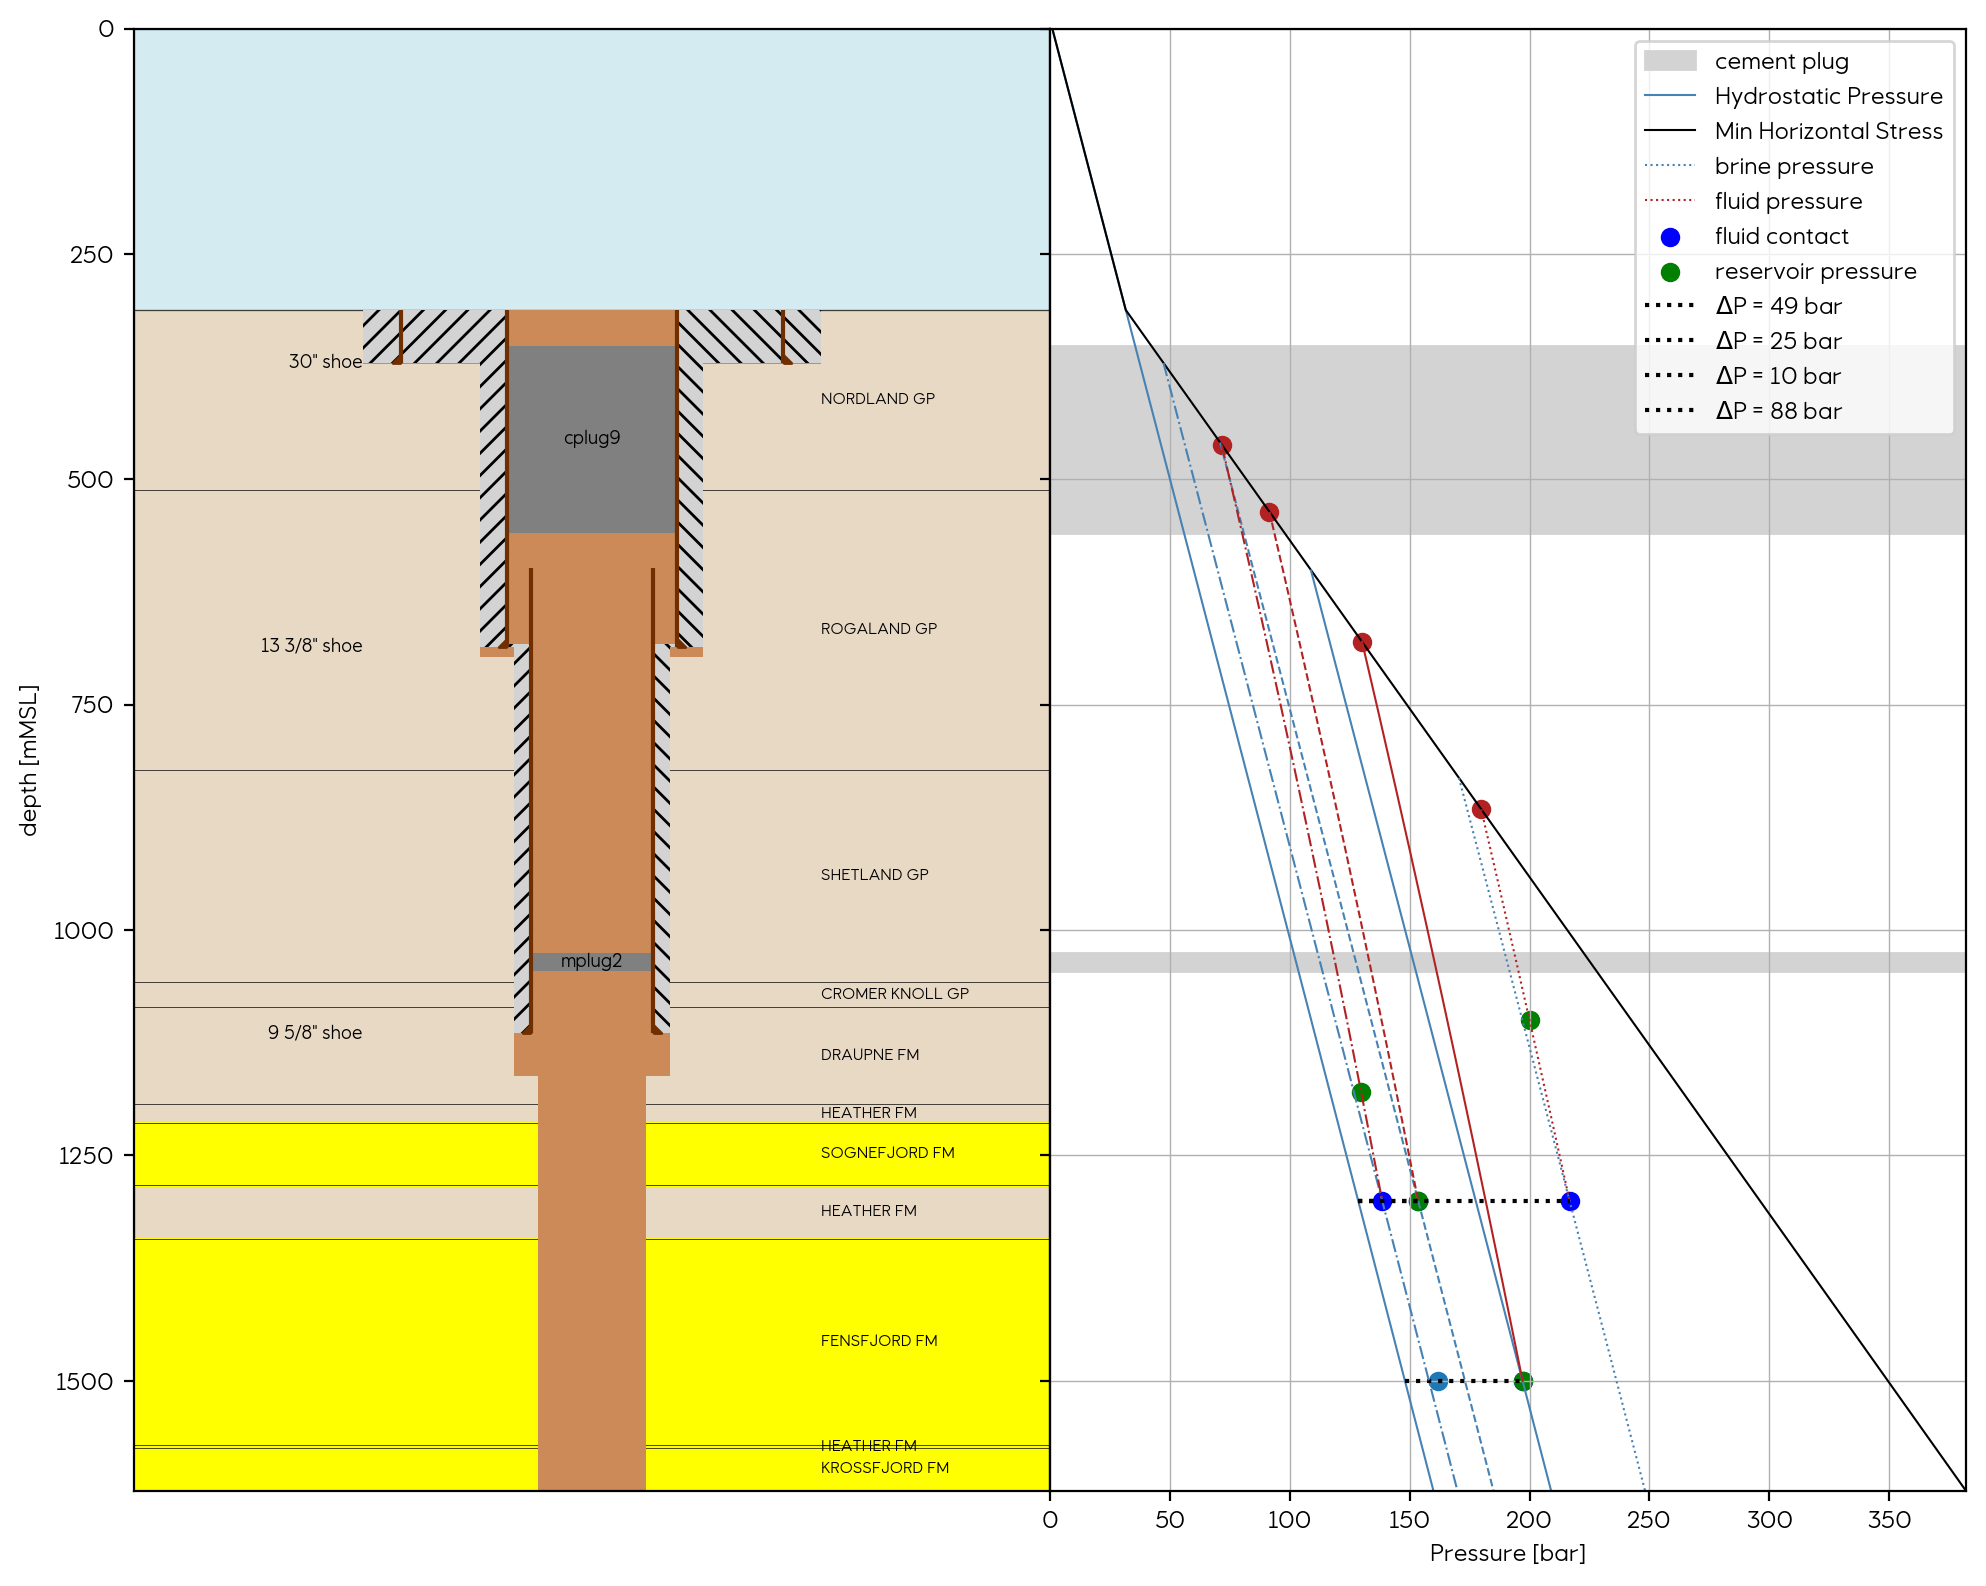

In [43]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
            #   plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )

ax2.scatter(161.73, 1500)
# ax2.scatter(139.99502221055212, 1100)


fig.tight_layout()
fig.subplots_adjust(wspace=0)

# Visualization

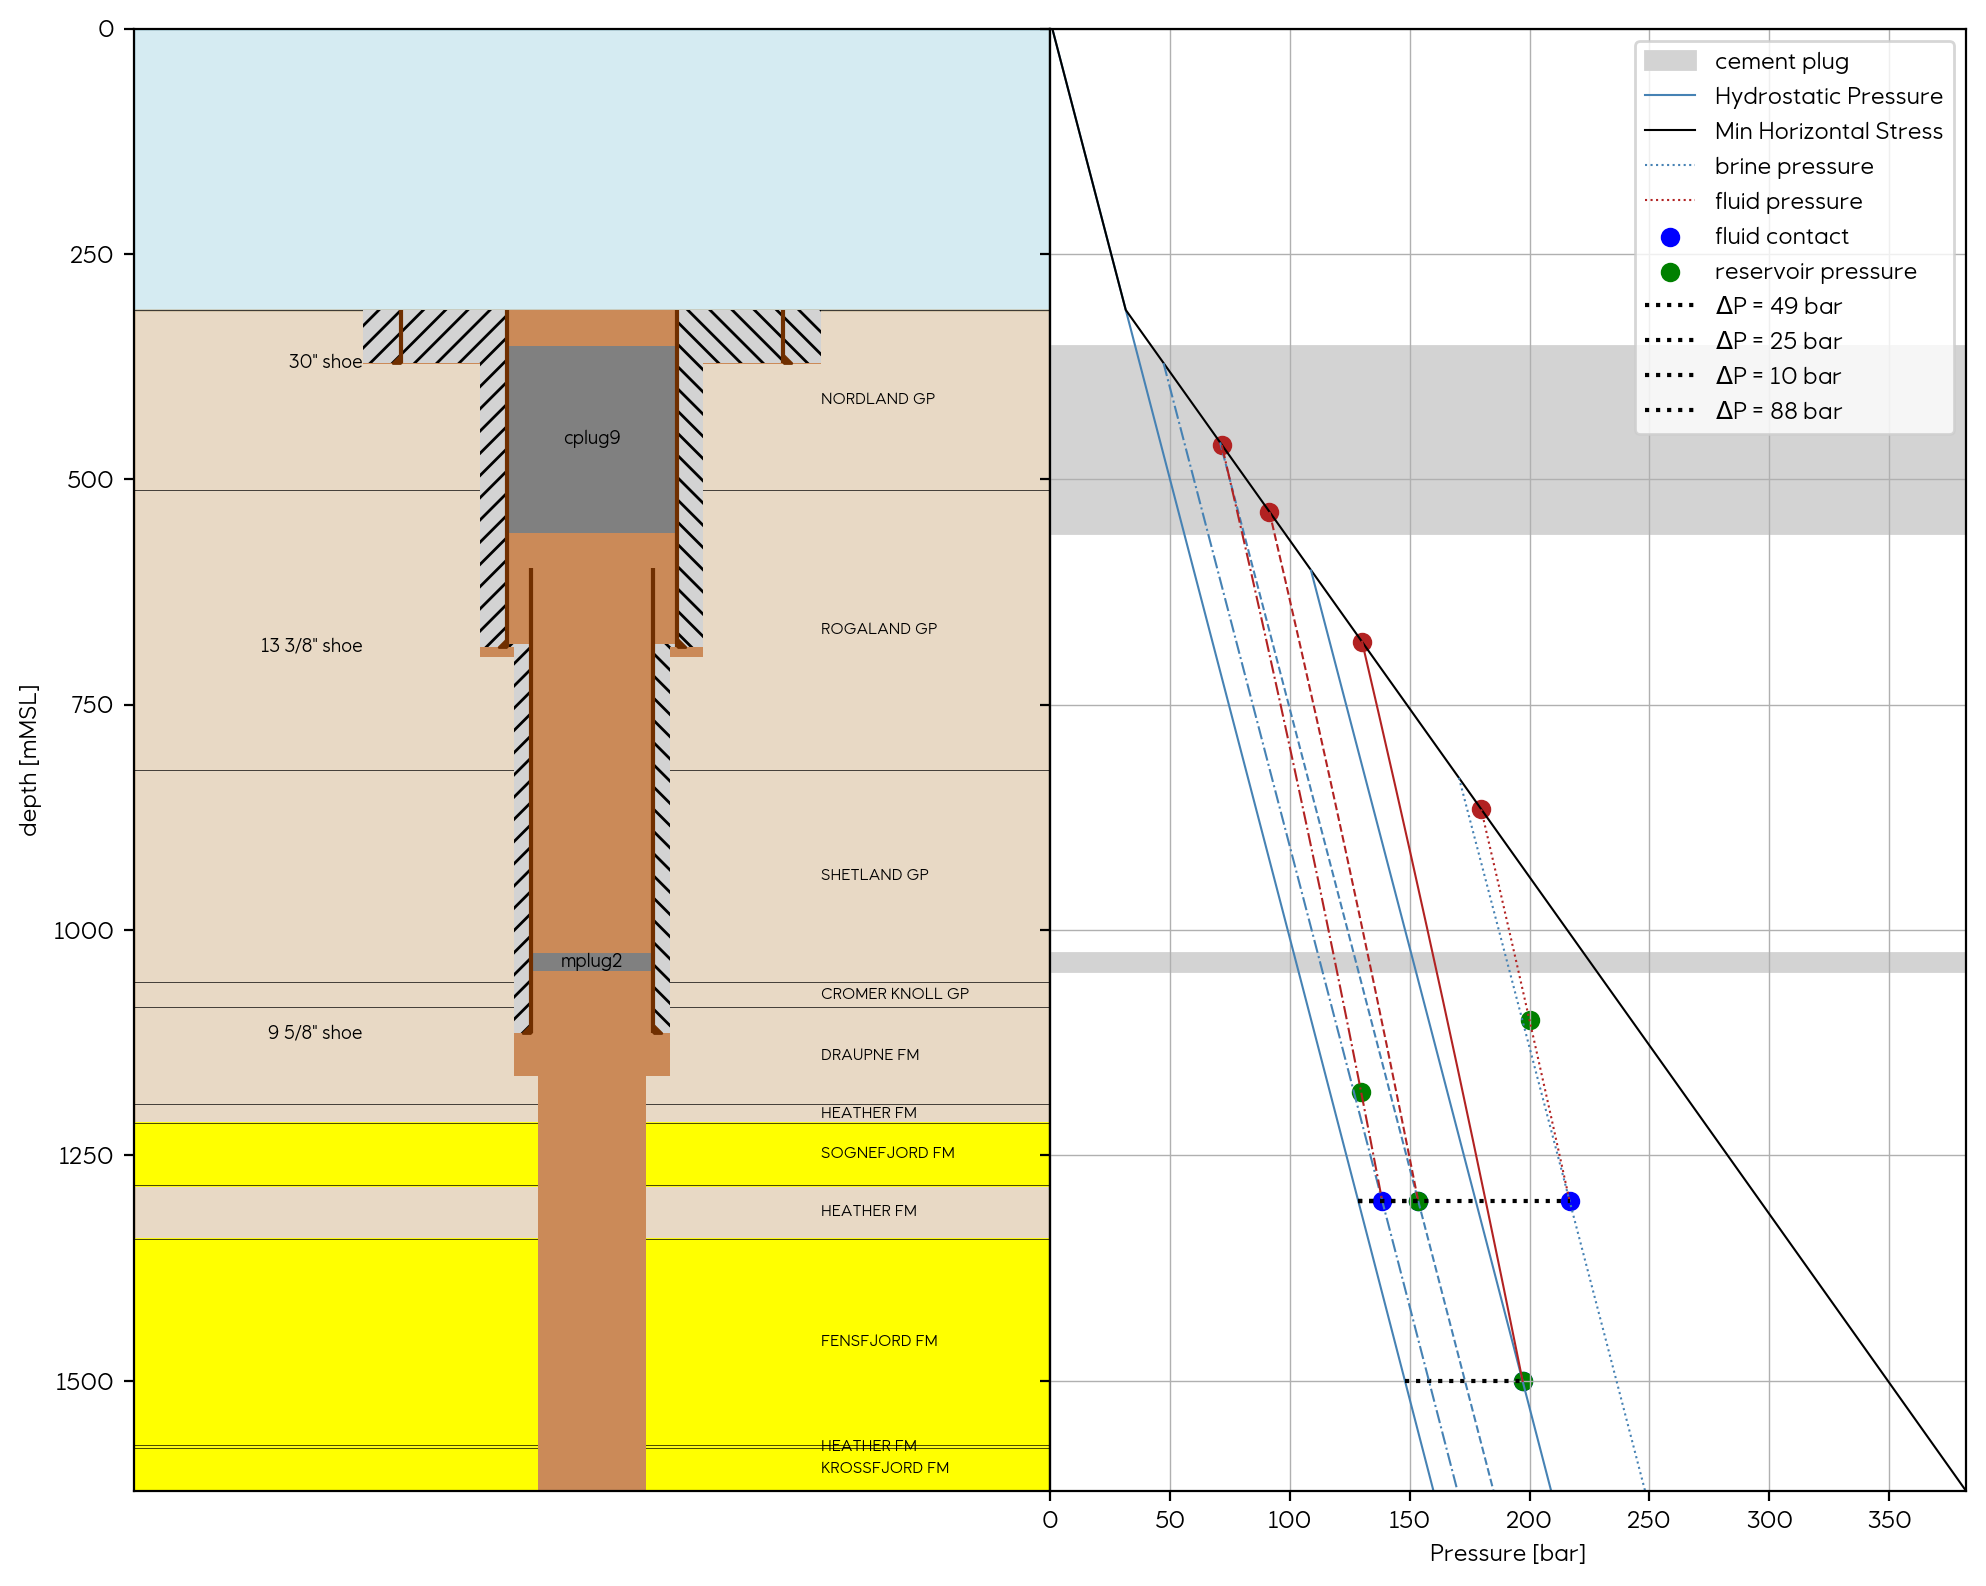

In [30]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2, 
            #   plot_HSP=True, #plot brine hydrostatic gradient
              plot_MSAD= True, #plot minimum safety abandonment depth
              )




fig.tight_layout()
fig.subplots_adjust(wspace=0)


## Test different fluid compositions

In [ ]:
well_csv['reservoir_pressure']['depth_msl'] = 1215.75

In [ ]:
pvt_path = '../src/WellClass/libs/pvt/pvt_constants/pure_co2'

my_pressure_pure_co2 = Pressure(
    header      = well_csv['well_header'],
    # reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path,
    # max_pressure_pos = 500,
    # max_pressure_pos = my_well.barriers,
)



In [ ]:
pvt_path_m1 = '../src/WellClass/libs/pvt/pvt_constants/mixture1'

my_pressure_mix1 = Pressure(
    header      = well_csv['well_header'],
    # reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path_m1,
    # max_pressure_pos = 500,
    # max_pressure_pos = my_well.barriers,
)

with open(pvt_path_m1 + "/metadata.json", "r") as file:
    mixture_info = json.load(file)

mixture1_name = mixture_info['name']
mixture1_composition = mixture_info['composition']


In [ ]:
pvt_path_m2 = '../src/WellClass/libs/pvt/pvt_constants/mixture2'

my_pressure_mix2 = Pressure(
    header      = well_csv['well_header'],
    # reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path_m2,
    # max_pressure_pos = 500,
    # max_pressure_pos = my_well.barriers,
)

with open(pvt_path_m2 + "/metadata.json", "r") as file:
    mixture_info = json.load(file)

mixture2_name = mixture_info['name']
mixture2_composition = mixture_info['composition']


In [ ]:
pvt_path_m3 = '../src/WellClass/libs/pvt/pvt_constants/methane'

my_pressure_mix3 = Pressure(
    header      = well_csv['well_header'],
    # reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path_m3,
    # max_pressure_pos = 500,
    # max_pressure_pos = my_well.barriers,
)

with open(pvt_path_m3 + "/metadata.json", "r") as file:
    mixture_info = json.load(file)

mixture3_name = mixture_info['name']
mixture3_composition = mixture_info['composition']


In [ ]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, draw_open_hole=False, ax=ax1)
plot_pressure(my_pressure_pure_co2, my_well.geology, my_well.barriers, ax=ax2, 
            #   plot_HSP=True, #plot brine hydrostatic gradient
              plot_RP=True, #plot reservoir pressure scenarios
              plot_MSAD= True, #plot minimum safety abandonment depth
              plot_maxP=True, #plot max expected pressures
              legend=False
              )

ls_list = ['solid','dashed','dashdot', 'dotted']


colors = ['firebrick', 'darkorange', 'forestgreen', 'royalblue']

for idx, case in enumerate([my_pressure_mix1, my_pressure_mix2, my_pressure_mix3]):

    counter = idx+1
    pt_df = case.pressure_CO2
    sc_delta_p = case.pressure_scenarios[0]['p_delta']
    sc_msad_p = case.pressure_scenarios[0]['p_MSAD']
    sc_msad_z = case.pressure_scenarios[0]['z_MSAD']
    sc_name = 'hydrostatic'
    sc_label = rf'mix {counter} P ($\Delta$P = {sc_delta_p:.0f} bar'
    sc_label = f'{sc_label}\n{case.mixture_composition}'
    sc_label = f'{sc_label}\nMSAD = {sc_msad_z:.0f} mTVDMSL'
                
    ax2.scatter(sc_msad_p, sc_msad_z, color=colors[counter])
    sf_depth = my_well.header['sf_depth_msl']
    pt_df[pt_df[('init', 'depth_msl')]>=sf_depth].plot(x=(sc_name, 'co2'), y=('init', 'depth_msl'), ax=ax2, label = sc_label, color=colors[counter], legend=False, lw = 0.75)


# ax2.legend()
handles, labels = ax2.get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
# ax2.legend(lgd.values(), lgd.keys(), loc='upper right')

# Add this part to move the legend outside the axes
fig.legend(lgd.values(), lgd.keys(), loc='upper center', bbox_to_anchor=(0.5, 0), ncol=2)

fig.tight_layout()
fig.subplots_adjust(wspace=0)

# CO2 Leakage

In [ ]:
# pick one barrier
main_barrier = well_csv['main_barrier']
main_barrier

In [ ]:
# compute its leakage
barrier_leakage = my_pressure.compute_barrier_leakage(my_well, main_barrier)
barrier_leakage

In [ ]:
! pip install schemdraw


<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_633/1348946425.py:9: SyntaxWarning: invalid escape sequence '\D'
  flow.Box(h=4).label('Pressure scenario schema:\n- p_fluid_contact\n- z_fluid_contact\n- p_resrv\n- z_resrv\n- p_MSAD\n- z_MSAD\n- overp ($\Delta$p)').drop('S')


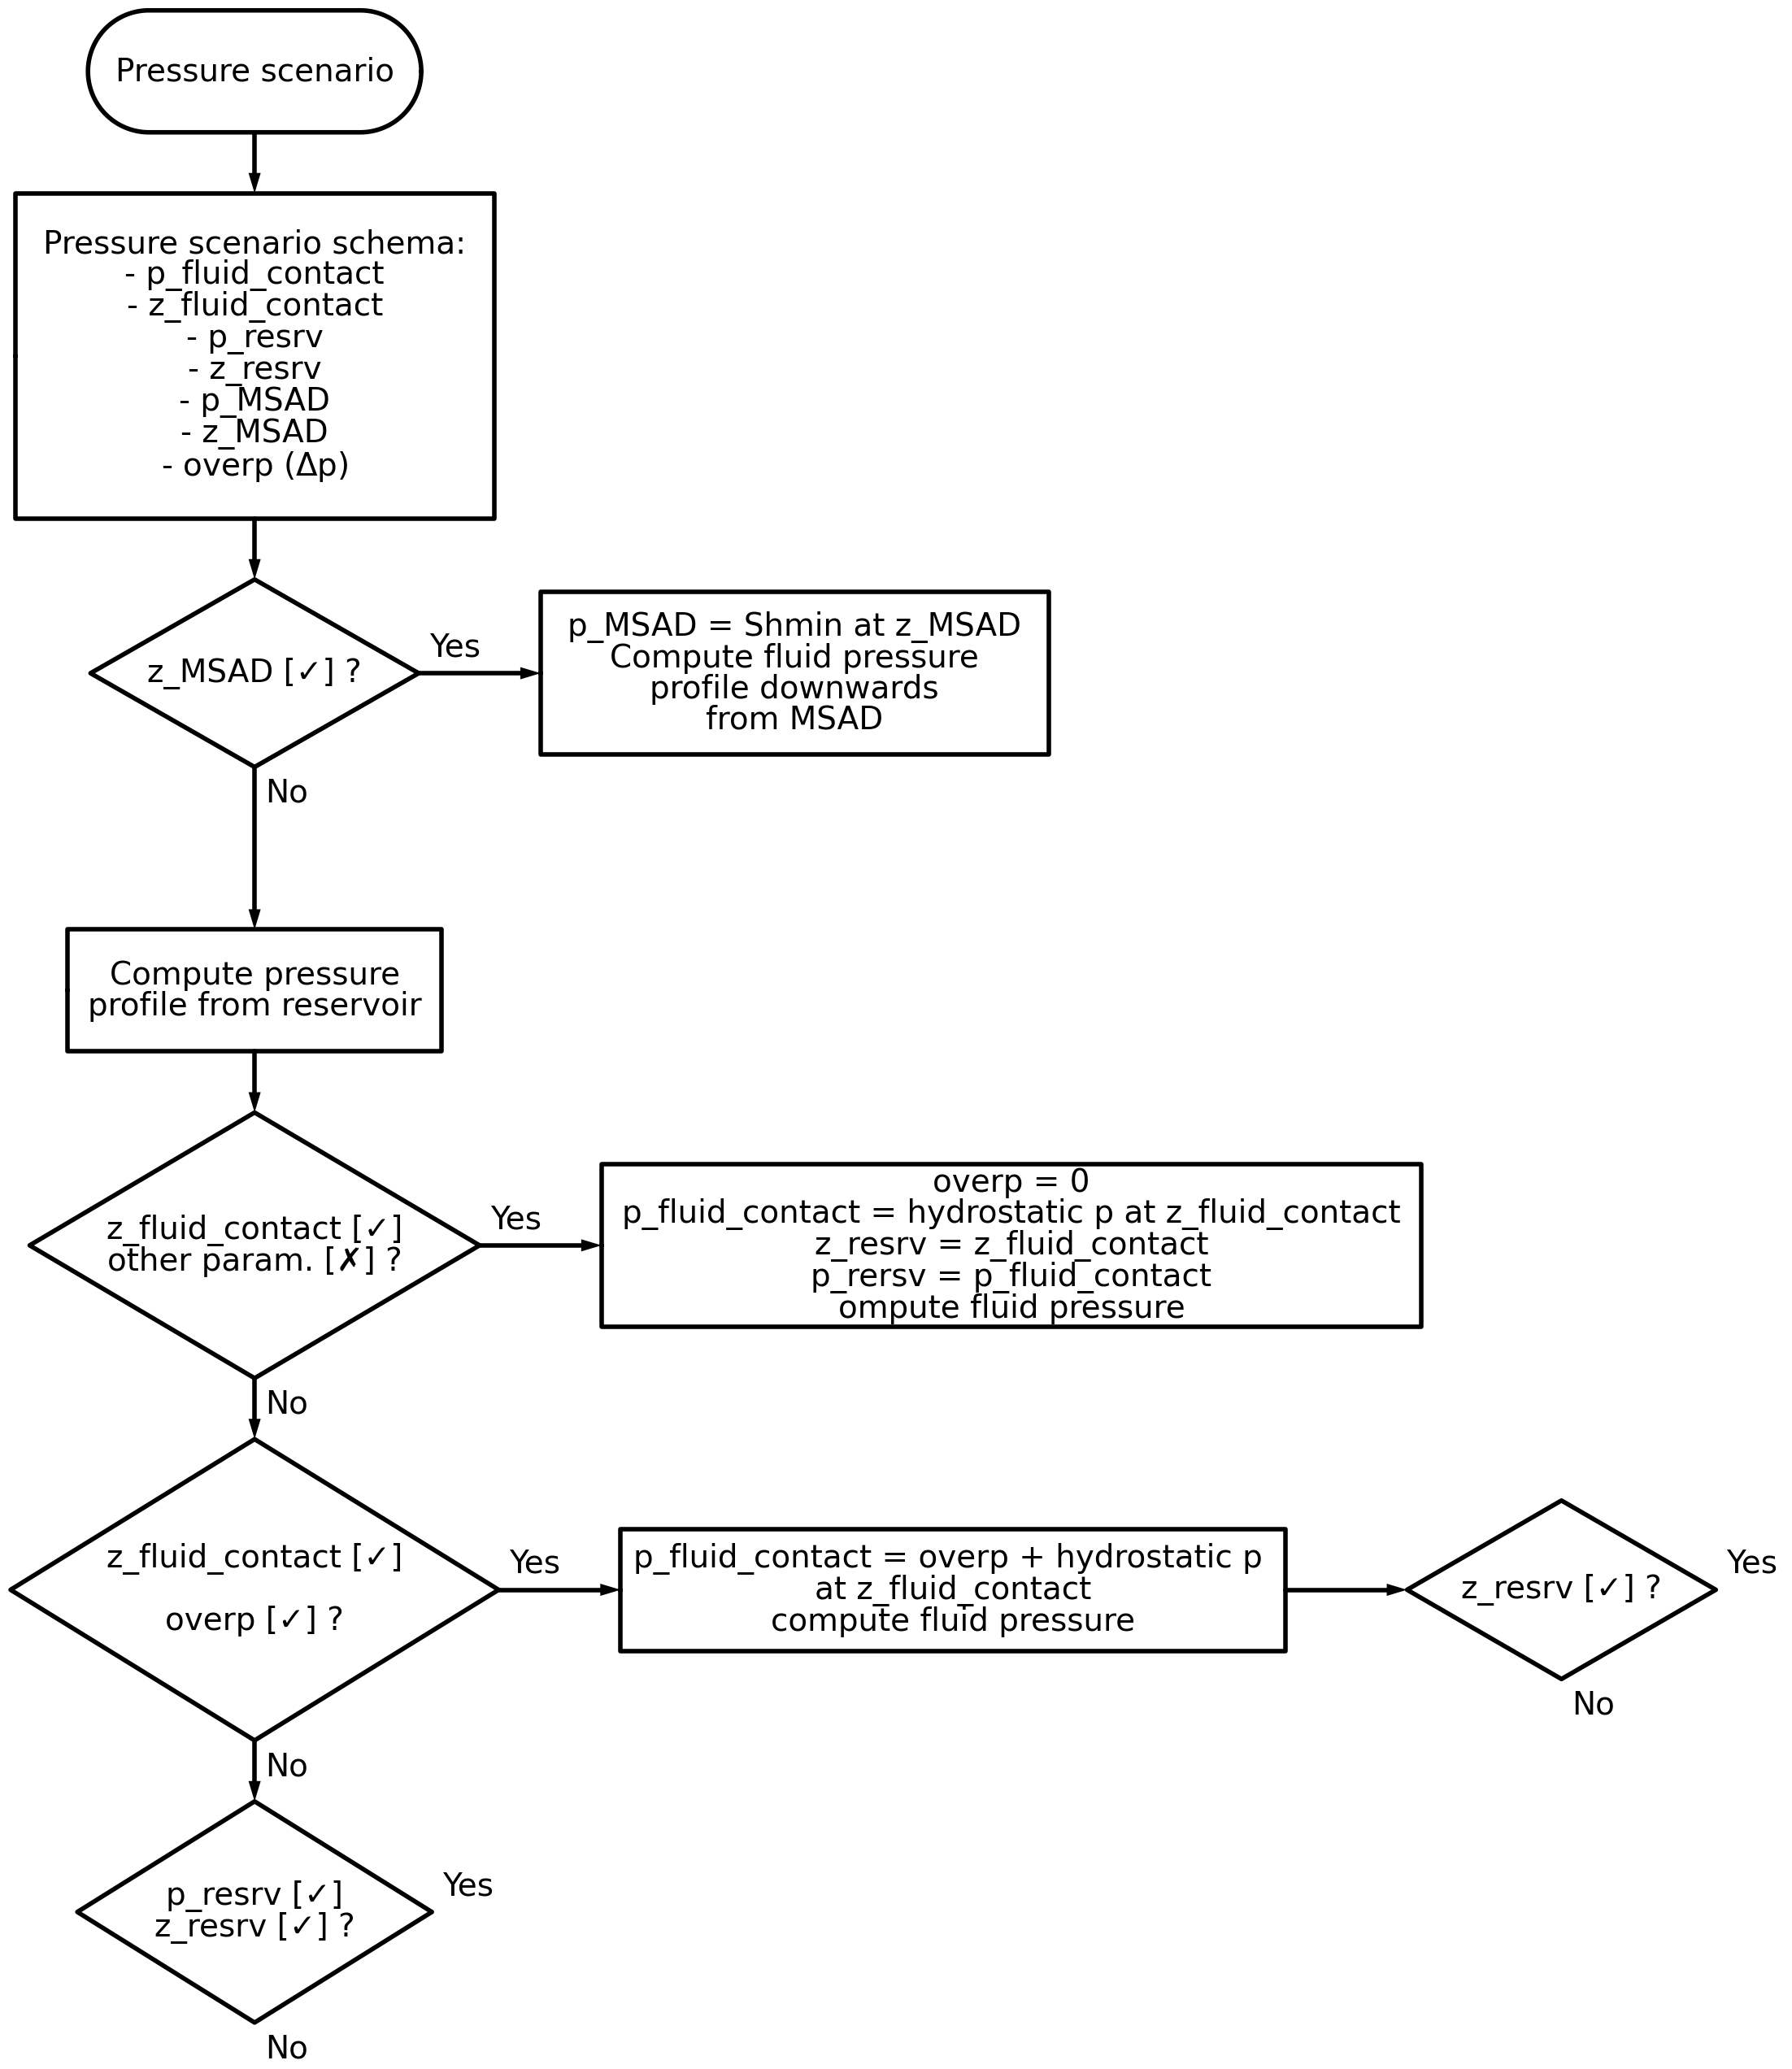

In [ ]:
import schemdraw
import schemdraw.elements as elm
import schemdraw.flow as flow

with schemdraw.Drawing() as d:
    d.config(unit=.75)
    flow.Start(h=1.5).label('Pressure scenario').drop('S')
    flow.Arrow().down()
    flow.Box(h=4).label('Pressure scenario schema:\n- p_fluid_contact\n- z_fluid_contact\n- p_resrv\n- z_resrv\n- p_MSAD\n- z_MSAD\n- overp ($\Delta$p)').drop('S')
    flow.Arrow().down()
    dA = flow.Decision(E='Yes', S='No').label('z_MSAD [\u2713] ?')
    flow.Arrow(l=2).down().at(dA.S)
    dAB = flow.Box(h=1.5).label('Compute pressure\nprofile from reservoir')
    flow.Arrow(l=1.5).right().at(dA.E)
    dAA = flow.Box(h=2).label('p_MSAD = Shmin at z_MSAD\nCompute fluid pressure\nprofile downwards\nfrom MSAD').drop('S')



    flow.Arrow().down().at(dAB.S)
    dABB = flow.Decision(E='Yes', S='No').label('z_fluid_contact [\u2713]\nother param. [\u2717] ?')
    flow.Arrow().down()
    dABBB = flow.Decision(E='Yes', S='No').label('z_fluid_contact [\u2713]\n\noverp [\u2713] ?')
    flow.Arrow().down()
    dABBBB = flow.Decision(E='Yes', S='No').label('p_resrv [\u2713]\nz_resrv [\u2713] ?')
    flow.Arrow(l=1.5).right().at(dABB.E)
    dABBA = flow.Box(h=2).label('overp = 0\np_fluid_contact = hydrostatic p at z_fluid_contact\nz_resrv = z_fluid_contact\np_rersv = p_fluid_contact\ncompute fluid pressure').drop('S')
    flow.Arrow(l=1.5).right().at(dABBB.E)
    dABBBA = flow.Box(h=1.5).label('p_fluid_contact = overp + hydrostatic p \nat z_fluid_contact\ncompute fluid pressure').drop('S')
    flow.Arrow(l=1.5).right().at(dABBBA.E)
    dABBBAA = flow.Decision(E='Yes', S='No').label('z_resrv [\u2713] ?')

    # flow.Arrow().down()
    # flow.Box(h=1.5).label('wrong combination of input').drop('S')


    # flow.Arrow(l=1.5).right().at(from_resrv.E)
    # from_MSAD = flow.Box(h=1.5).label('compute fluid pressure\nprofile downwards\nfrom MSAD').drop('S')
    # flow.Arrow().right().at(from_MSAD.E)
    # from_MSAD_fc = flow.Decision(E='Yes', S='No').label('fluid contact [\u2713] ?')
    # flow.Arrow(l=1.5).right().at(from_MSAD_fc.E)
    # from_MSAD_fc_True = flow.Box(h=1.5).label('compute brine pressure\nprofile fromfluid pressure at\nfluid contact depth').drop('S')
    # flow.Arrow(l=1.5).down().at(from_MSAD_fc.S)
    # from_MSAD_fc_False = flow.Box(h=2).label('Assume overp = 0.\nz_fluid_contact, p_fluid_contact = intersection between\nfluid pressure and hydrostatic gradients').drop('S')

    # flow.Arrow(l=1.5).right().at(fluid_contact.E)
    # fluid_contact_True = flow.Box(h=2.0).label('Assume overpressure  = 0.\nBrine pressure profile = hydrostatic\nCompute fluid pressure profile from \n brine pressure at fluid contact depth').drop('S')


    # flow.Arrow(l=1.5).right().at(fluid_contact_ovp.E)
    # from_r = flow.Decision(E='Yes', S='No').label('reservoir pressure [\u2713] ?')
    # flow.Arrow(l=1.5).right().at(from_r.E)
    # from_rr = flow.Decision(E='Yes', S='No').label('z (reservoir)\n<\nz (fluid contact)?')
    # flow.Arrow(l=1.5).right().at(from_rr.E)
    # from_rr_True = flow.Box(h=1.5).label('interpolate reservoir pressure\nfrom ').drop('S')
    # fluid_contact_ovp_True = flow.Box(h=1.5).label('Compute profiles from \np (fluid contact) + $\Delta$p').drop('S')

    # flow.Box().label('Add final\nelement\nto dictionary').drop('S')
    # flow.Arrow().down()
    # flow.Start().label('Stop')
    # flow.Arrow().at(k2.S)
    # kn = flow.Decision(W='No', S='Yes').label('Is $k$ a\nfactor of $n$?').drop('W')
    # flow.Arrow().left().length(1)
    # flow.Box().label('Replace $k$\nby $k+1$').drop('N')
    # flow.Arrow().toy(k2.W).dot(open=True)
    # flow.Arrow().tox(k2.W)

    # flow.Arrow().down().at(kn.S)
    # flow.Box().label('Replace $n$\nby $n/k$')
    # flow.Arrow()
    # k3 = flow.Decision(E='No', W='Yes').label('Is $k$ in\ndictionary?').drop('E')

    # flow.Arrow().left().at(k3.W).length(1)
    # rep = flow.Box().label('Replace $v$\nby $v+1$')
    # flow.Arrow()
    # dot = flow.Arrow().up().toy(k2.W).dot(open=True)
    # flow.Arrow().right().tox(rep.N)

    # flow.Arrow().at(k3.E).right().length(1)
    # flow.Box().label('Add $k$ to\ndictionary\nwith $v=1$').drop('S')
    # flow.Arrow().down()
    # flow.Arrow().left().to(rep.W, dx=-1.5)
    # flow.Arrow().up().toy(k2.W)
    # flow.Arrow().right().tox(dot.center)